# Concevez une application au service de la santé publique 1: Nettoyage

Objectifs: 
-  Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations. Le programme doit fonctionner si la base de données est légèrement modifiée (ajout d’entrées, par exemple). 
- Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. L’appel à projets spécifie que l’analyse doit être simple à comprendre pour un public néophyte. Soyez donc attentif à la lisibilité : taille des textes, choix des couleurs, netteté suffisante, et variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.
-  Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.
- Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.
- Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet.

# Sommaire
### [I Exploration du jeu de données et sélection des variables](#I-Exploration-du-jeu-de-données-et-sélection-des-variables)
__[I.1 Chargement des données](#I.1-Chargement-des-données)__

__[I.2 Sélection des variables](#I.2-Sélection-des-variables)__\
[I.2.1 product_name et generic_name](#I.2.1-product_name-et-generic_name)\
[I.2.2 quantity - brands_tags](#I.2.2-quantity---brands_tags)\
[I.2.3 Categories](#I.2.3-Categories)\
[I.2.4 Origins - Manufacturing_places - purchase places - countries](#I.2.4-Origins---Manufacturing_places---purchase-places---countries)\
[I.2.5 labels - stores](#I.2.5-labels---stores)\
[I.2.6 PNNS groups](#I.2.6-PNNS-groups)\
[I.2.7 Variables en lien avec les données nutritionnelles](#I.2.7-Variables-en-lien-avec-les-données-nutritionnelles)\
[I.2.8 Conclusion](#I.2.8-Conclusion)

__[Création des dataframes pour chaque idée d'application](#Création-des-dataframes-pour-chaque-idée-d'application)__\
[Première idée](#Première-idée)\
[Deuxième idée](#Deuxième-idée)\
[Troisième idée](#Troisième-idée)
### [II Nettoyage des datasets](#II-Nettoyage-des-datasets)
__[II.1 Chargement des datasets](#II.1-Chargement-des-datasets)__

__[II.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes](#II.2-Nettoyage-du-jeu-de-données:-valeurs-incohérentes-et/ou-extrêmes)__\
[II.2.1 Valeurs typiques et atypiques des compositions énergétiques totale et par macro-nutriment](#II.2.1-Valeurs-typiques-et-atypiques-des-compositions-énergétiques-totale-et-par-macro-nutriment)\
[II.2.2 Valeurs typiques et atypiques des compositions énergétiques totales par groupe d'aliments (pnns_groups)](#II.2.2-Valeurs-typiques-et-atypiques-des-compositions-énergétiques-totales-par-groupe-d'aliments-(pnns_groups))\
[II.2.3 Traitement des valeurs atypiques: cohérence des variables](#II.2.3-Traitement-des-valeurs-atypiques:-cohérence-des-variables)\
[II.2.3.i Traitement sur la sous-catégorie des carottes râpées](#II.2.3.i-Traitement-sur-la-sous-catégorie-des-carottes-râpées)\
[II.2.3.ii Traitement sur les données générales](#II.2.3.ii-Traitement-sur-les-données-générales)\
[II.2.4 Fusion des catégories Fruits et fruits](#II.2.4-Fusion-des-catégories-Fruits-et-fruits)

__[II.3 Traitement des valeurs manquantes](#II.3-Traitement-des-valeurs-manquantes)__\
[II.3.1 Remplissage de fiber_kcal](#II.3.1-Remplissage-de-fiber_kcal)\
[II.3.2 Cas des autres macronutriments: fat, carbohydrates et proteins](#II.3.2-Cas-des-autres-macronutriments:-fat,-carbohydrates-et-proteins)\
[II.3.3 Nettoyage des valeurs aberrantes (bis)](#II.3.3-Nettoyage-des-valeurs-aberrantes-(bis))
### [III Automatisation des traitements](#III-Automatisation-des-traitements)  

__[III.1 Chargement des données et sélection des variables](#III.1-Chargement-des-données-et-sélection-des-variables)__\
__[III.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes](#III.2-Nettoyage-du-jeu-de-données:-valeurs-incohérentes-et/ou-extrêmes)__\
[III.2.1 Conversion des valeurs en grammes en valeurs en kcal](#III.2.1-Conversion-des-valeurs-en-grammes-en-valeurs-en-kcal)\
[III.2.2 Nettoyage des valeurs aberrantes (1): conversion en kcal des valeurs données en kJ](#III.2.2-Nettoyage-des-valeurs-aberrantes-(1):-conversion-en-kcal-des-valeurs-données-en-kJ)\
[III.2.3 Nettoyage des valeurs aberrantes (2): sélection des individus non aberrants par la différence entre énergie calculée et énergie renseignée](#III.2.3-Nettoyage-des-valeurs-aberrantes-(2):-sélection-des-individus-non-aberrants-par-la-différence-entre-énergie-calculée-et-énergie-renseignée)\
__[III.3 Reformulation des valeurs nutritionnelles en fonction des serving_quantity](#III.3-Reformulation-des-valeurs-nutritionnelles-en-fonction-des-serving_quantity)__


# Partie 1 Exploration du jeu de données et Nettoyage des données

# I Exploration du jeu de données et sélection des variables

## I.1 Chargement des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import missingno as msno

In [3]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,38,47,52,55,64,134) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1835100 entries, 0 to 1835099
Columns: 186 entries, code to carnitine_100g
dtypes: float64(122), int64(2), object(62)
memory usage: 2.5+ GB


In [5]:
df.shape

(1835100, 186)

In [7]:
df[df.duplicated()]['pnns_groups_2']

1381508    unknown
Name: pnns_groups_2, dtype: object

**Trois idées d'application:**

1. Une idée d'application pourrait être de fournir des recommandations de sélection de plats et/ou d'aliments permettant de suivre les recommandations du PNNS:
    - Au moins 5 fruits et légumes par jour
    - Des féculents à chaque repas selon l’appétit
    - 3 produits laitiers (lait, yaourt, fromage) par jour
    - 1 à 2 portions de viande, œufs et produits de la pêche par jour
    - Limiter les matières grasses ajoutées, le sucre et le sel

    Cette recommandation doit proposer les produits de meilleurs nutriscore et ecoscore dans leurs catégories. Dans un premier temps, on pourra limiter cette recommandation à un combo One-dish meal + yaourt + fruits. Autre possibilité: à partir d'un aliment scanné, proposer de quoi compléter le menu. On va avoir besoin des apports en energie, et lipides/glucides/protides.

    energie
    - homme 2700kcal
    - femme 2200 kcal

    nutriments
    - lipides 35-40% AET (80-110g)
    - protides 10-20% AET (50-125g)
    - glucides 40-55% AET (205-340g)
    - sucres: max 100g
    - fibres: 30g

    On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'énergie, les apports en sel/protéines/lipides et glucides et les types d'aliments. Le nutriscore et l'ecoscore pour pouvoir faire une sélection des produits les plus écologiques et sains (dans leur catégorie).

2. Une deuxième idée pourrait être de donner, à partir d'un ensemble de produits scannés, les quantités de sucre, sel, gras protéines fibres absorbés. On peut ensuite fournir une note se référant aux AJR, ou aux recommandations du PNNS: par exemple, verifier que la quantité de sel ingérée est inférieure à 7,5g, que l'apport en fibres se rapproche de 30g etc.

3. Enfin, une dernière idée pourrait être de simplement donner un meilleur équivalent en termes de nutriscore, ecoscore, nova_group etc. d'un produit scanné.

## I.2 Sélection des variables

**Commençons par afficher les colonnes**

In [8]:
cols = pd.Series(df.columns)
cols.head(50)

0                          code
1                           url
2                       creator
3                     created_t
4              created_datetime
5               last_modified_t
6        last_modified_datetime
7                  product_name
8      abbreviated_product_name
9                  generic_name
10                     quantity
11                    packaging
12               packaging_tags
13               packaging_text
14                       brands
15                  brands_tags
16                   categories
17              categories_tags
18                categories_en
19                      origins
20                 origins_tags
21                   origins_en
22         manufacturing_places
23    manufacturing_places_tags
24                       labels
25                  labels_tags
26                    labels_en
27                    emb_codes
28               emb_codes_tags
29     first_packaging_code_geo
30                       cities
31      

### I.2.1 product_name et generic_name

**Regardons si on peut raisonnablement se séparer des produits pour lesquels product_name n'est pas renseigné**

In [160]:
d = df.loc[df.product_name.isna()]

In [198]:
d.shape

(78702, 186)

In [199]:
d = df.loc[df.product_name.notna()]

In [200]:
d.shape

(1756398, 186)

In [353]:
pna = df.product_name.isna().sum()/df.shape[0]
print("Le product_name n'est pas renseigné dans {:.1f}% des cas.".format(pna*100))

Le product_name n'est pas renseigné dans 4.3% des cas.


**La proportion de lignes pour lesquelles product_name n'est pas renseigné est plutôt faible.**

**Affichons la matrice de remplissage pour les deux colonnes product_name et generic_name**

<AxesSubplot:>

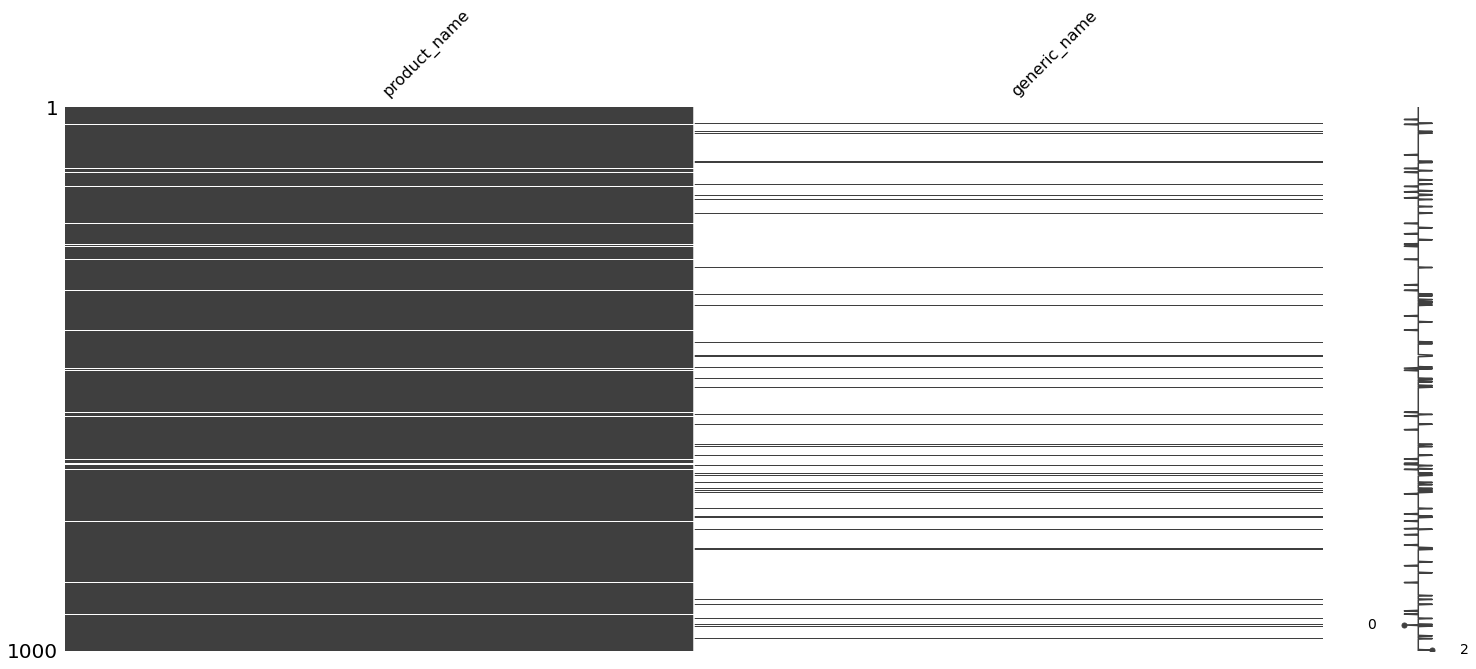

In [204]:
msno.matrix(df[['product_name', 'generic_name']].sample(1000))

In [205]:
df.dropna(subset=['product_name', 'generic_name'], how='all')

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835096,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835097,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835098,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Si on ne garde que les lignes pour lesquelles generic_name est renseigné, a-t-on beaucoup de NaN dans la colonne product_name?**

In [208]:
d = df.loc[df.generic_name.notna()]
d.loc[d.product_name.isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
276672,0200030115662,http://world-en.openfoodfacts.org/product/0200...,kiliweb,1541894643,2018-11-11T00:04:03Z,1581540998,2020-02-12T20:56:38Z,NaN,NaN,Chocolat au lait 28% de cacao,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
326661,0390526004003,http://world-en.openfoodfacts.org/product/0390...,agamitsudo,1398250595,2014-04-23T10:56:35Z,1568044377,2019-09-09T15:52:57Z,NaN,NaN,Carrés feuilletés,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480245,12000810,http://world-en.openfoodfacts.org/product/1200...,openfoodfacts-contributors,1617282923,2021-04-01T13:15:23Z,1617393845,2021-04-02T20:04:05Z,NaN,NaN,Kalorienarmes koffeinhaltiges Erfrischungsgetränk,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481838,12772035,http://world-en.openfoodfacts.org/product/1277...,cjk,1601028226,2020-09-25T10:03:46Z,1601063426,2020-09-25T19:50:26Z,NaN,NaN,"Wrong barcode scanned, see 4388844163362",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491349,2000000038095,http://world-en.openfoodfacts.org/product/2000...,bleakpatch,1478519058,2016-11-07T11:44:18Z,1478519979,2016-11-07T11:59:39Z,NaN,NaN,Бананы,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1777305,87179095,http://world-en.openfoodfacts.org/product/8717...,kiliweb,1543925434,2018-12-04T12:10:34Z,1616495035,2021-03-23T10:23:55Z,NaN,NaN,"cereal balls with 20% whole grain oat flakes, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815957,9186130057938,http://world-en.openfoodfacts.org/product/9186...,openfoodfacts-contributors,1474118815,2016-09-17T13:26:55Z,1619345408,2021-04-25T10:10:08Z,NaN,NaN,Assortiment de biscuits,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823929,9326451765161,http://world-en.openfoodfacts.org/product/9326...,foodorigins,1465468578,2016-06-09T10:36:18Z,1565969294,2019-08-16T15:28:14Z,NaN,NaN,Champagne ham,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1828616,9415767035355,http://world-en.openfoodfacts.org/product/9415...,marilyn,1562257079,2019-07-04T16:17:59Z,1562257229,2019-07-04T16:20:29Z,NaN,NaN,Jus d'orange,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Le nombre de lignes pour lesquelles generic_name est renseigné mais product_name est manquant est très réduit en comparaison du nombre de lignes du dataset. On peut éliminer les lignes pour lesquelles product_name n'est pas renseigné, car dans la grande majorité des cas generic_name n'est alors pas renseigné non plus, et il est alors impossible de savoir de quel produit il s'agit.**

In [368]:
df.dropna(subset=['product_name'])

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1835095,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835096,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835097,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835098,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### I.2.2 quantity - brands_tags

In [13]:
df.columns[10:16].to_numpy()

array(['quantity', 'packaging', 'packaging_tags', 'packaging_text',
       'brands', 'brands_tags'], dtype=object)

In [15]:
np.array(["serving_size", "serving_quantity"])

array(['serving_size', 'serving_quantity'], dtype='<U16')

In [19]:
pack_cols = pd.Index(np.concatenate((df.columns[10:16].to_numpy(), np.array(["serving_size", "serving_quantity"]))))

In [20]:
pack = df[pack_cols]
pack.dropna()

,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,serving_size,serving_quantity
3008,227 g,Plastic film,plastic-film,Non recycled,"M&S,Marks & Spencer","m-s,marks-spencer",114 g,114.0
19533,700 g,bag,bag,Not Yet Recycled,"Sainsbury's,Sainsburys, By sainsbury's","sainsbury-s,sainsburys,by-sainsbury-s",125 g,125.0
20269,125 g,"en:pet-tray, en:mixed plastic-film","en-pet-tray,en-mixed-plastic-film","TRAY – PLASTIC check local recycling, FILM - P...","By Sainsbury's, Liz Earle","by-sainsbury-s,liz-earle",3 slices (37.5 g),37.5
49486,150 g,"en:ldpe-lid, en:pp-tub","en-ldpe-lid,en-pp-tub","POT Widely Recycled, FILM Not Yet Recycled",Sainsbury's,sainsbury-s,80 g,80.0
56704,900g,en:mixed plastic-bag,en-mixed-plastic-bag,Recycle with bags at larger stores. Check loca...,"Sainsbury's,By sainsbury's","sainsbury-s,by-sainsbury-s",125g,125.0
...,...,...,...,...,...,...,...,...
1822334,640 mL,"Glass,Bottle","glass,bottle",1 glass bottle to recycle,Bundaberg,bundaberg,320 mL,320.0
1824274,1 L,Plastic,plastic,"1 HDPE 2 Bottle to recycle, 1 LDPE 4 coloured ...",Maleny Dairies,maleny-dairies,100 ml,100.0
1824600,500 ml,"Plastic,Bottle","plastic,bottle","1 plastic cap to discard, 1 plastic bottle to ...",Nippy's,nippy-s,500 ml,500.0
1826528,330g,"Plastic,Cardboard","plastic,cardboard",Recyclable Our containers are made BPA free & ...,My Muscle Chef,my-muscle-chef,330g,330.0


**serving_quantity peut être intéressante pour calculer des quantités par portions. En revanche les autres variables ne vont probablement pas nous servir**

### I.2.3 Categories

In [410]:
categories = df[['product_name',
        'categories',
        'categories_tags',
        'categories_en',
        'main_category',
        'main_category_en'
        ]].dropna()

In [411]:
categories.head()

,product_name,categories,categories_tags,categories_en,main_category,main_category_en
5,moutarde au moût de raisin,"Epicerie, Condiments, Sauces, Moutardes","en:groceries,en:condiments,en:sauces,en:mustards","Groceries,Condiments,Sauces,Mustards",en:mustards,Mustards
6,Sfiudwx,Xsf,fr:xsf,fr:xsf,fr:xsf,fr:xsf
15,Pate d'amende,Pâte d'amende,fr:pate-d-amende,fr:pate-d-amende,fr:pate-d-amende,fr:pate-d-amende
16,Salade de carottes râpées,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr...","Meals,Prepared vegetables,Grated carrots,Seaso...",en:seasoned-shredded-carrots,Seasoned shredded carrots
25,Tarte noix de coco,"Tartes, Tartes sucrées, Tartes à la noix de coco","en:pies,en:sweet-pies,en:coconut-pies","Pies,Sweet pies,Coconut pies",en:coconut-pies,Coconut pies


**Parmi les colonnes "categories", la colonne "categories_tags" semble mieux appropriée car formatée. On ne conserve que cette colonne**

In [390]:
categories = categories.drop(columns=['categories', 'categories_en', 'main_category_en'])

In [391]:
categories.categories_tags.nunique()

29949

**Beaucoup de categories_tags différents. C'est sans doute car chaque tag est un assemblage de plusieurs tags.**

**Regardons ce qu'il en est des main_category**

In [392]:
categories.main_category.nunique()

13370

**C'est donc aussi le cas pour les main_category. Idéalement, il faudrait pouvoir séparer les categories_tags. Mais regardons d'abord les colonnes pnns_groups qui sont également des catégories d'aliments et de plats.**

### I.2.4 Origins - Manufacturing_places - purchase places - countries

**On va regarder les colonnes origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
purchase_places
countries
countries_tags
countries_en
de plus près**

In [133]:
df[['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
3,Filetes de pollo empanado,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
4,Hamburguesas de ternera 100%,NaN,NaN,NaN,NaN,NaN,NaN,en:es,en:spain,Spain
...,...,...,...,...,...,...,...,...,...,...
1835095,Sandwich club Rillette poisson combava,NaN,NaN,NaN,NaN,NaN,NaN,en:re,en:reunion,Réunion
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835097,Fati,NaN,NaN,NaN,NaN,NaN,NaN,en:be,en:belgium,Belgium
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**Essayons de ne récupérer que les produits vendus en France**

In [134]:
df.loc[df.countries_tags=='en:france'][['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]

,product_name,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,purchase_places,countries,countries_tags,countries_en
0,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1,Vitória crackers,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
2,Cacao,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
5,moutarde au moût de raisin,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
6,Sfiudwx,NaN,NaN,NaN,NaN,NaN,NaN,en:France,en:france,France
...,...,...,...,...,...,...,...,...,...,...
1835089,Minis beignets,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835092,Steak haché pur boeuf,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France
1835096,Thé noir BIO Darjeeling,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France
1835098,Light & Free SKYR A BOIRE,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France


**Y a-t-il des colonnes qui se démarquent en terme de remplissage?**

<AxesSubplot:>

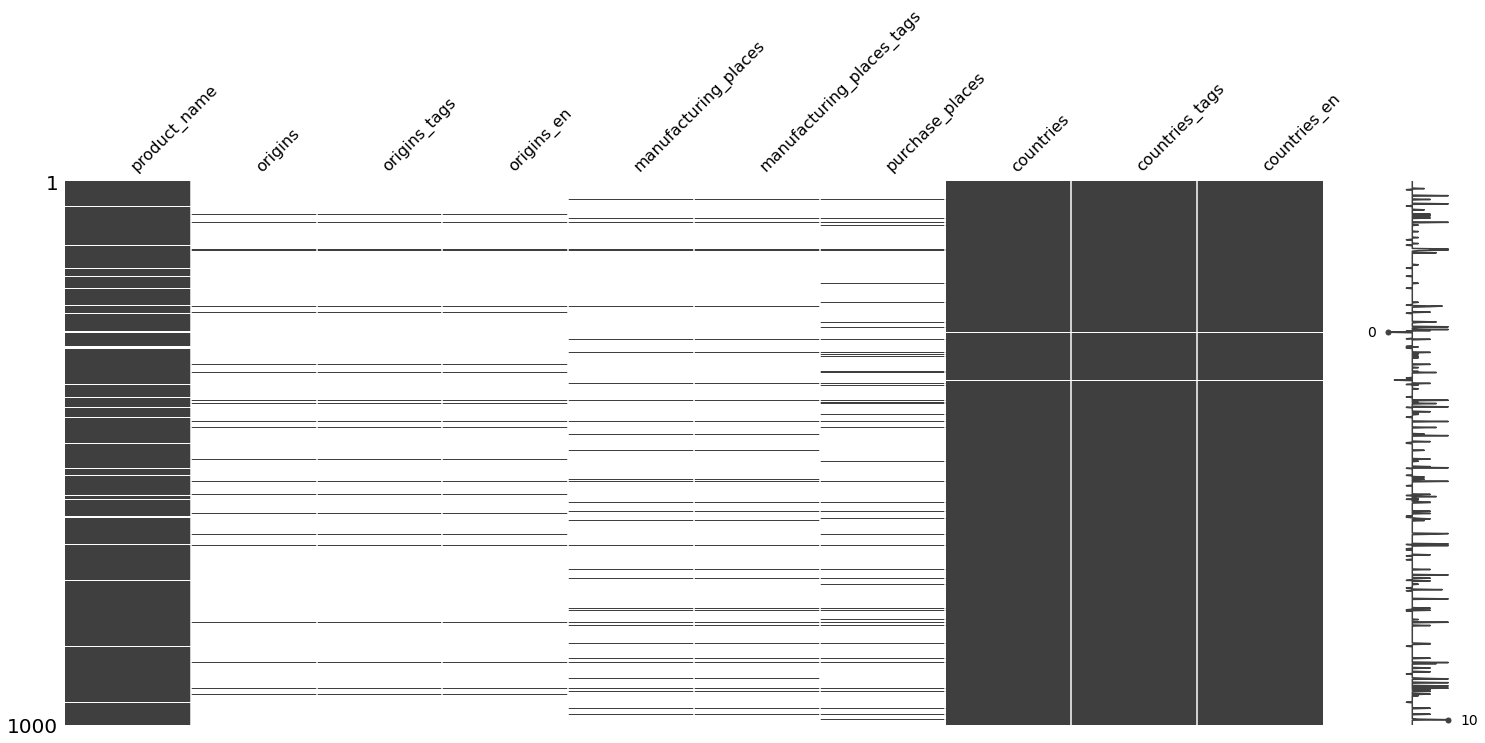

In [355]:
d =  df[['product_name',
    'origins',
    'origins_tags',
    'origins_en',
    'manufacturing_places',
    'manufacturing_places_tags',
    'purchase_places',
    'countries',
    'countries_tags',
    'countries_en']]
msno.matrix(d.sample(1000))

**On ne garde que les colonnes countries: mieux renseignées, et pour le moment l'information qu'apportent les autres colonnes ne semble pas indispensable.**

### I.2.5 labels - stores

In [401]:
labels = df[df.columns[24:34]]
labels.dropna()

,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores


In [403]:
# Regardons pour des sous-ensembles de colonnes
labels_1 = labels[labels.columns[:5]]
labels_1.dropna()

,labels,labels_tags,labels_en,emb_codes,emb_codes_tags
357,Point Vert,en:green-dot,Green Dot,EMB 35275A,emb-35275a
745,"Vegetariano, Vegano","en:vegetarian,en:vegan","Vegetarian,Vegan","ES 26.01868/TO EC, FABRICANTE Y ENVASADOR:, BO...","es-26-01868-to-ec,fabricante-y-envasador,bolto..."
970,"Point Vert, Fabriqué en France","en:green-dot,en:made-in-france","Green Dot,Made in France",000050,000050
1164,Unpasteurised milk,en:unpasteurised-milk,Unpasteurised-milk,FR 14.342.001 EC,fr-14-342-001-ec
1446,"French meat, fr:Viande Bovine Française , en:g...","en:french-meat,en:green-dot,fr:viande-bovine-f...","French meat,Green Dot,fr:viande-bovine-francaise",FR 31.091.010 EC,fr-31-091-010-ec
...,...,...,...,...,...
1834676,en:nutriscore-grade-e,"en:nutriscore,en:nutriscore-grade-e","Nutriscore,Nutriscore Grade E",FR 22.046.001 EC,fr-22-046-001-ec
1834758,Laktózmentes,en:no-lactose,No lactose,HU 250 EK,hu-250-ec
1834777,en:ab-agriculture-biologique,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,AB Agriculture Biologique",FR 49.192.009 CE,fr-49-192-009-ec
1834926,1702,fr:1702,fr:1702,04/f04001152/003,04-f04001152-003


**La colonne EMB rassemble des indications diverses: EMB d'une part, et également estampille sanitaire. Pas terrible, mais potentiellement utile pour inférer/vérifier la provenance d'un produit si nécessaire.**

In [404]:
labels_2 = labels[labels.columns[5:]]
labels_2.dropna()

,first_packaging_code_geo,cities,cities_tags,purchase_places,stores


<AxesSubplot:>

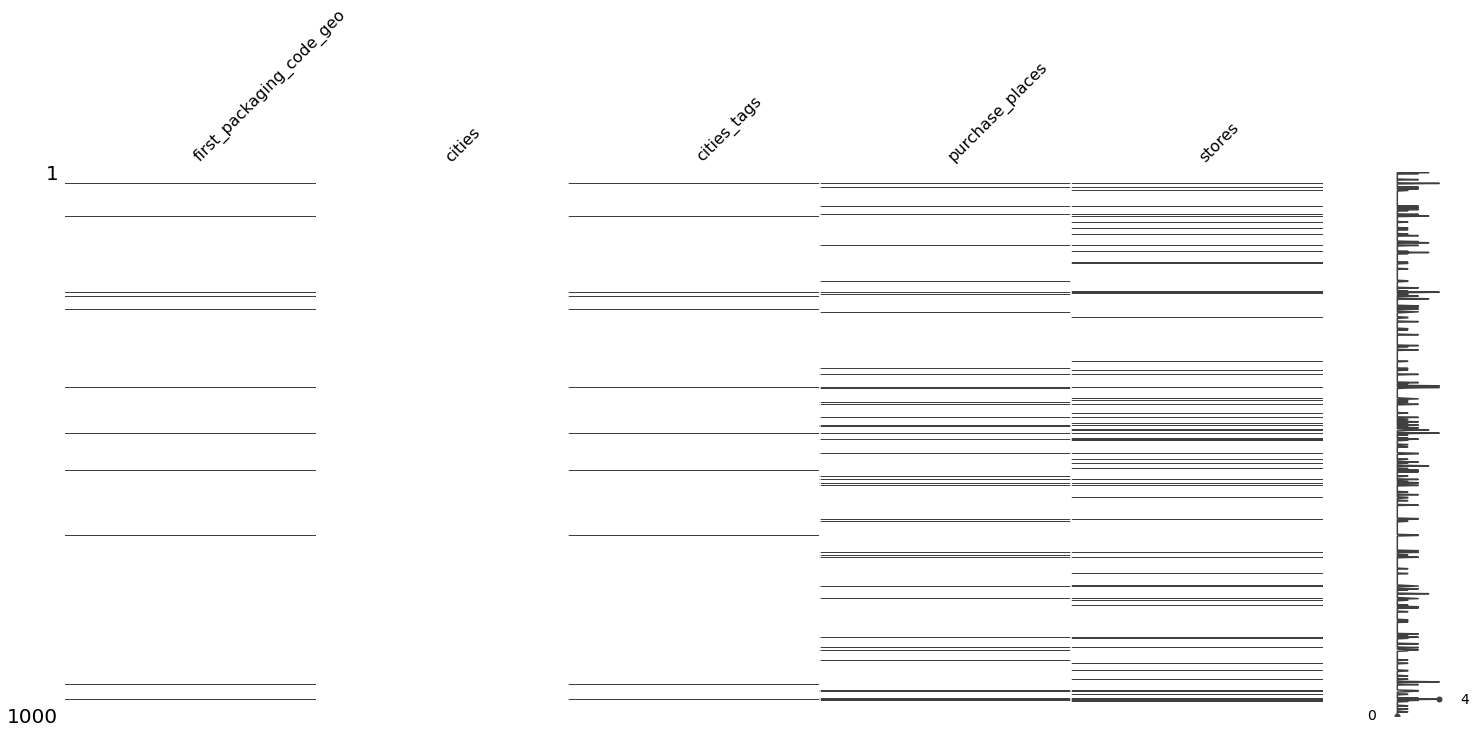

In [406]:
msno.matrix(labels_2.sample(1000))

**Cities totalement vide. On peut supprimer cette colonne et regarder les autres**

In [409]:
labels_2 = labels[labels.columns[5:]].drop(columns='cities')
labels_2.dropna()

,first_packaging_code_geo,cities_tags,purchase_places,stores
1164,"49.316667,-1.1",isigny-sur-mer-calvados-france,Ireland,Tesco
2058,"43.683333,0.816667",blanquefort-gers-france,Paris,Monoprix
19462,"47.483333,-3.116667",quiberon-morbihan-france,France,la belle iloise
23530,"47.683333,-0.866667",segre-maine-et-loire-france,Guadeloupe,Monoprix
45044,"44.45,4.716667",donzere-drome-france,"Orly,France,Paris,Le Brusc (83140)","Intermarché,Carrefour City"
...,...,...,...,...
1829991,"50.683333,1.916667",vieil-moutier-pas-de-calais-france,"Marseille 5°,France,Marseille",Azur Promo
1830123,"48.7,2.5",brunoy-essonne-france,"Noyelles-Godault,France,Caen","Auchan,Coop 5 pour 100"
1830130,"48.7,2.5",brunoy-essonne-france,"France,Manosque","Biocoop, Biocoop Caluire"
1834386,"46.166667,-1.15",rochelle-charente-maritime-france,"France,La Rochelle,Niort",Ernest Le Glacier


**Informations peu intéressantes pour nous dans un premier temps.** 

### I.2.6 PNNS groups

In [884]:
categories = df[['product_name',
                 'generic_name',
                 'categories_tags',
                 'pnns_groups_1',
                 'pnns_groups_2'
                ]].dropna()

In [885]:
categories.shape

(109390, 5)

In [886]:
categories.head(20)

,product_name,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,"en:meals,en:meat-based-products,en:meals-with-...",Composite foods,One-dish meals
337,Salade Cesar,Laitue en salade,"en:plant-based-foods-and-beverages,en:plant-ba...",Fruits and vegetables,Vegetables
351,Danoises à la cannelle roulées,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",Sugary snacks,Biscuits and cakes
368,Flute,Flute,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Bread
375,Chaussons tressés aux pommes,Pâtisserie,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",sugary-snacks,pastries
392,Pain Burger Artisan,Pain,fr:boulange,unknown,unknown
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,"en:groceries,en:sauces,en:pestos",Fat and sauces,Dressings and sauces
401,Crème d'Artichaut Bio Kazidomi,Crème d'artichaut,"en:spreads,en:salted-spreads,en:artichoke-spreads",Salty snacks,Salty and fatty products
415,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,"en:snacks,en:sweet-snacks,en:biscuits-and-cake...",Sugary snacks,Biscuits and cakes
420,Quiche Lorraine,Quiche lorraine,"en:meals,en:pizzas-pies-and-quiches,en:quiches...",Composite foods,Pizza pies and quiche


In [17]:
categories.pnns_groups_2.nunique()

44

**Mieux! Regardons en détail les catégories et pnns_groups_2 pour la première entrée**

In [25]:
categories.iloc[0].categories_tags

'en:meals,en:meat-based-products,en:meals-with-meat,en:poultry-meals,en:microwave-meals,en:turkey-dishes'

**La présence de féculents n'est pas signalée**

**Qu'en est-il des colonnes labels, main_category?**

In [21]:
df[['product_name',
    'generic_name',
    'main_category',
    'main_category_en',
    'labels',
    'labels_tags',
    'labels_en'
   ]].dropna()

,product_name,generic_name,main_category,main_category_en,labels,labels_tags,labels_en
334,Blanquette de Volaille et son Riz,Blanquette de Volaille et son Riz,en:turkey-dishes,Turkey dishes,"Viande Française, Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:viande-francaise,Made in France"
399,Pesto à La Roquette Bio Kazidomi,Pesto à La Roquette,en:pestos,Pestos,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
401,Crème d'Artichaut Bio Kazidomi,Crème d'artichaut,en:artichoke-spreads,Artichoke spreads,"Organic, EU Organic, Non-EU Agriculture, EU Ag...","en:organic,en:eu-organic,en:non-eu-agriculture...","Organic,EU Organic,Non-EU Agriculture,EU Agric..."
415,Biscuits sablés fourrage au cacao,Biscuits sablés déclassés fourrage au cacao,en:shortbread-cookies,Shortbread cookies,Point Vert,en:green-dot,Green Dot
426,Bonbons acidulés Raisin Fraise,Bonbons acidulés Raisin Fraise,en:candies,Candies,"Contient des OGMs, Sans arômes artificiels","en:no-artificial-flavors,en:contains-gmos","No artificial flavors,Contains GMOs"
...,...,...,...,...,...,...,...
1834592,SAUMON EDEN,INTER AGRO,en:seafood,Seafood,Jamais congelé,en:never-frozen,Never frozen
1834697,Roussette du Bugey (2011),Vins blanc du Bugey,fr:bugey,fr:Bugey,AOC,fr:aoc,fr:AOC
1834731,Thé vert Earl grey,thé bio équitable,en:herbal-teas,Herbal teas,"Organic, EU Organic, Fair trade, Max Havelaar,...","en:organic,en:eu-organic,en:fair-trade,en:ab-a...","Organic,EU Organic,Fair trade,AB Agriculture B..."
1834951,Pate feuilletée sans gluten,Pâte Feuilletée avec de la matière grasse végé...,en:puff-pastry-sheets,Puff pastry sheets,Sans gluten,en:gluten-free,Gluten-free


**Dans un premier temps, les colonnes labels et main_category ne vont pas nous être très utiles. On se contentera des colonne categories ou pnns_groups pour catégoriser nos aliments.**

**quelles sont exactement les catégories pnns_groups_1 et 2?**

In [30]:
print(df.pnns_groups_1.unique())

['unknown' 'Fat and sauces' 'Composite foods' 'Sugary snacks'
 'Fruits and vegetables' 'Fish Meat Eggs' 'Beverages'
 'Milk and dairy products' 'Cereals and potatoes' 'Salty snacks'
 'sugary-snacks' nan 'fruits-and-vegetables' 'cereals-and-potatoes'
 'salty-snacks']


In [38]:
print(df.pnns_groups_2.dropna().unique())

['unknown' 'Dressings and sauces' 'One-dish meals' 'Biscuits and cakes'
 'Fruits' 'Meat' 'Sweetened beverages' 'Cheese' 'Bread' 'Fish and seafood'
 'Sweets' 'Salty and fatty products' 'Fruit juices' 'Dried fruits'
 'Vegetables' 'Fats' 'Dairy desserts' 'Milk and yogurt' 'pastries'
 'Pizza pies and quiche' 'Legumes' 'Unsweetened beverages' 'Nuts'
 'Cereals' 'Alcoholic beverages' 'Breakfast cereals' 'Appetizers'
 'Processed meat' 'Chocolate products' 'Eggs'
 'Plant-based milk substitutes' 'vegetables' 'Sandwiches' 'Ice cream'
 'Soups' 'Teas and herbal teas and coffees' 'Potatoes'
 'Artificially sweetened beverages' 'Waters and flavored waters' 'Offals'
 'fruits' 'Fruit nectars' 'Pizza pies and quiches' 'cereals' 'legumes'
 'nuts']


**Dans quelle catégorie(s) se retrouvent les pâtes alimentaires?**

In [41]:
df[df.generic_name=="spaghetti"][['generic_name', 'categories_tags', 'pnns_groups_1', 'pnns_groups_2']]

,generic_name,categories_tags,pnns_groups_1,pnns_groups_2
1553128,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals
1574254,spaghetti,"en:plant-based-foods-and-beverages,en:plant-ba...",Cereals and potatoes,Cereals


**Quels aliments contient pnns_groups_2==Cereals?**

In [47]:
df[df.pnns_groups_2=='Cereals']['generic_name'].dropna()

2774                                             Wheat Flour
2976                                      Tom Yum Noodle Pot
3124                                               Sacchetti
3592                                      Self raising flour
4592       Pasta de sémola de trigo duro adicionada con v...
                                 ...                        
1831326              vermicelles de riz thaï 100% naturelles
1831339                     Nouilles de riz blanc Biologique
1831340                   Nouilles de riz complet Biologique
1831421                                Nouilles instantanées
1834951    Pâte Feuilletée avec de la matière grasse végé...
Name: generic_name, Length: 5787, dtype: object

**Pnns_groups_2 semble être pertinente pour notre traitement. On la garde pour le moment.**  
**Regardons maintenant les colonnes en lien avec les données nutritionnelles**

### I.2.7 Variables en lien avec les données nutritionnelles

<AxesSubplot:>

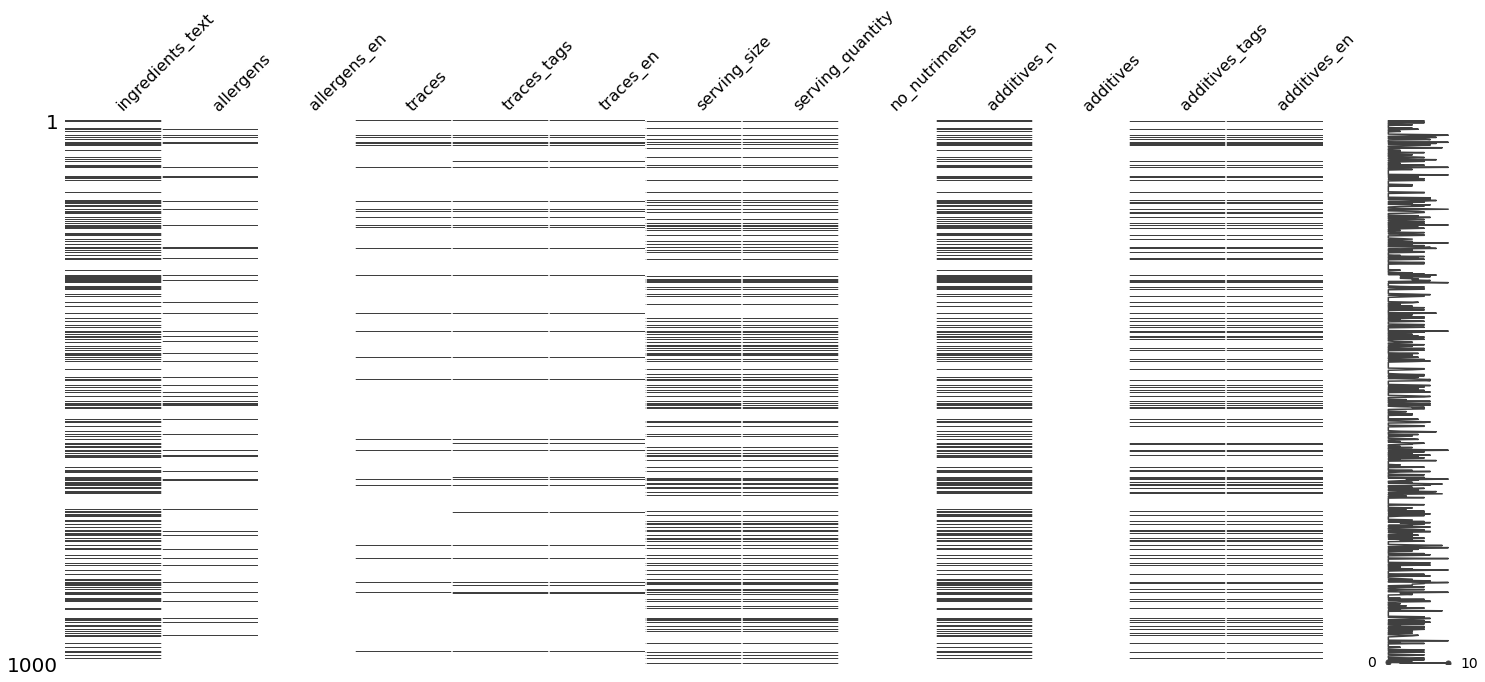

In [413]:
msno.matrix(df[df.columns[37:50]].sample(1000))

**On peut supprimer allergens_en, no_nutriments et additives**

In [414]:
df[df.columns[37:50]].drop(columns=['allergens_en', 'no_nutriments', 'additives']).dropna()

,ingredients_text,allergens,traces,traces_tags,traces_en,serving_size,serving_quantity,additives_n,additives_tags,additives_en
538,"Zucker, Kakaomasse, Kakaobutter, _Vollmilchpul...","en:milk,en:nuts,en:soybeans,de:Pisatazien","en:eggs,en:gluten,en:nuts,de:Alkohol","en:eggs,en:gluten,en:nuts,de:alkohol","Eggs,Gluten,Nuts,de:alkohol","12,5 g",12.5,3.0,"en:e322,en:e420,en:e422","E322 - Lecithins,E420 - Sorbitol,E422 - Glycerol"
764,"Farine de _blé_, huile de colza, sucre, _oeufs...","en:eggs,en:gluten,en:milk","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",17.6g,17.6,5.0,"en:e422,en:e450,en:e471,en:e500,en:e503","E422 - Glycerol,E450 - Diphosphates,E471 - Mon..."
907,"Farine de _blé_, _œufs_ frais, huile de colza,...","en:eggs,en:gluten,en:milk","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",serving,30.0,5.0,"en:e422,en:e450,en:e471,en:e500,en:e503","E422 - Glycerol,E450 - Diphosphates,E471 - Mon..."
962,Molkenproteinkonzentrat 99%(_Wheyproteinkonzen...,de:Wheyproteinkonzentrat,"en:gluten,en:milk,en:nuts","en:gluten,en:milk,en:nuts","Gluten,Milk,Nuts",31g,31.0,2.0,"en:e950,en:e955","E950 - Acesulfame k,E955 - Sucralose"
970,"Sucre, blanc d’_œufs_frais, poudre d’_amande_ ...","en:eggs,en:gluten,en:milk,en:nuts","en:nuts,en:soybeans","en:nuts,en:soybeans","Nuts,Soybeans",serving,22.0,3.0,"en:e422,en:e450,en:e500","E422 - Glycerol,E450 - Diphosphates,E500 - Sod..."
...,...,...,...,...,...,...,...,...,...,...
1831430,"EAU, OIGNONS, SAUCE SOJA EPAISSE (8.5%) (SUCRE...","en:crustaceans,en:gluten,en:soybeans",en:peanuts,en:peanuts,Peanuts,20 g,20.0,4.0,"en:e1422,en:e150a,en:e150c,en:e270","E1422 - Acetylated distarch adipate,E150a - Pl..."
1831817,"Wheat flour, Vegetable oil (Palm olein), Corn ...","en:gluten,en:milk,en:soybeans",en:peanuts,en:peanuts,Peanuts,22g,22.0,5.0,"en:e1100,en:e170,en:e170i,en:e322,en:e322i,en:...","E1100 - Alpha-Amylase,E170 - Calcium carbonate..."
1832336,"milk**, sugar, cocoa butter, cocoa mass, veget...",en:milk,"en:gluten,en:nuts","en:gluten,en:nuts","Gluten,Nuts",100 g,100.0,2.0,"en:e442,en:e476","E442 - Ammonium phosphatides,E476 - Polyglycer..."
1832439,"milk**, sugar, cocoa butter, cocoa mass, veget...",en:milk,"en:gluten,en:nuts","en:gluten,en:nuts","Gluten,Nuts",Per 100 g,100.0,2.0,"en:e442,en:e476","E442 - Ammonium phosphatides,E476 - Polyglycer..."


**Aucune colonne intéressante pour nous ici**

<AxesSubplot:>

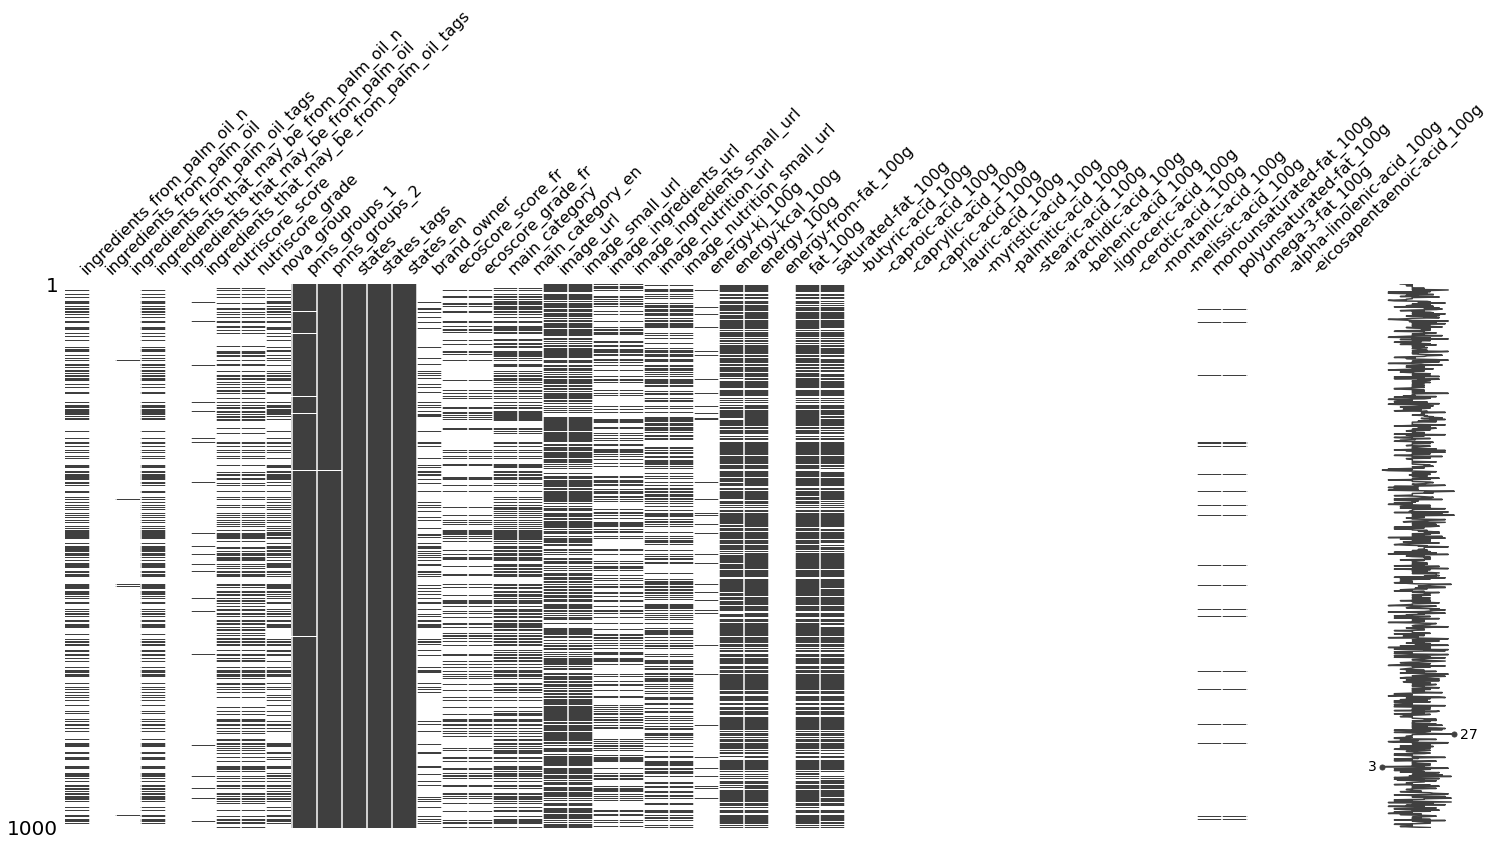

In [415]:
msno.matrix(df[df.columns[50:100]].sample(1000))

**Manifestement, il y a beaucoup de colonnes pour lesquelles le taux de remplissage est nul ou très faible.**

In [444]:
cols = df.columns[50:100]
df[df.columns[50:100]].notna().sum().sort_values()/df.shape[0]

ingredients_from_palm_oil                     0.000000
ingredients_that_may_be_from_palm_oil         0.000000
-caproic-acid_100g                            0.000003
-caprylic-acid_100g                           0.000003
-lignoceric-acid_100g                         0.000004
-stearic-acid_100g                            0.000006
-capric-acid_100g                             0.000007
-cerotic-acid_100g                            0.000007
-melissic-acid_100g                           0.000007
-myristic-acid_100g                           0.000008
-lauric-acid_100g                             0.000009
-montanic-acid_100g                           0.000011
-palmitic-acid_100g                           0.000014
-butyric-acid_100g                            0.000015
-behenic-acid_100g                            0.000019
-arachidic-acid_100g                          0.000050
-eicosapentaenoic-acid_100g                   0.000065
-alpha-linolenic-acid_100g                    0.000402
energy-fro

 **On décide de ne garder que les colonnes dont le taux de remplissage est supérieur à 1/100**

In [445]:
sort_cols = df[df.columns[50:100]].notna().sum().sort_values()/df.shape[0] > 1e-2
sort_cols

ingredients_from_palm_oil                     False
ingredients_that_may_be_from_palm_oil         False
-caproic-acid_100g                            False
-caprylic-acid_100g                           False
-lignoceric-acid_100g                         False
-stearic-acid_100g                            False
-capric-acid_100g                             False
-cerotic-acid_100g                            False
-melissic-acid_100g                           False
-myristic-acid_100g                           False
-lauric-acid_100g                             False
-montanic-acid_100g                           False
-palmitic-acid_100g                           False
-butyric-acid_100g                            False
-behenic-acid_100g                            False
-arachidic-acid_100g                          False
-eicosapentaenoic-acid_100g                   False
-alpha-linolenic-acid_100g                    False
energy-from-fat_100g                          False
omega-3-fat_

In [ ]:
d = df[cols]

In [446]:
keep_cols = sort_cols[sort_cols].index

In [447]:
keep_cols

Index(['ingredients_that_may_be_from_palm_oil_tags',
       'polyunsaturated-fat_100g', 'monounsaturated-fat_100g',
       'energy-kj_100g', 'brand_owner', 'ecoscore_score_fr',
       'ecoscore_grade_fr', 'nova_group', 'nutriscore_grade',
       'nutriscore_score', 'image_ingredients_url',
       'image_ingredients_small_url', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'main_category_en',
       'main_category', 'image_nutrition_url', 'image_nutrition_small_url',
       'image_small_url', 'image_url', 'energy-kcal_100g',
       'saturated-fat_100g', 'fat_100g', 'energy_100g', 'pnns_groups_1',
       'pnns_groups_2', 'states_en', 'states_tags', 'states'],
      dtype='object')

<AxesSubplot:>

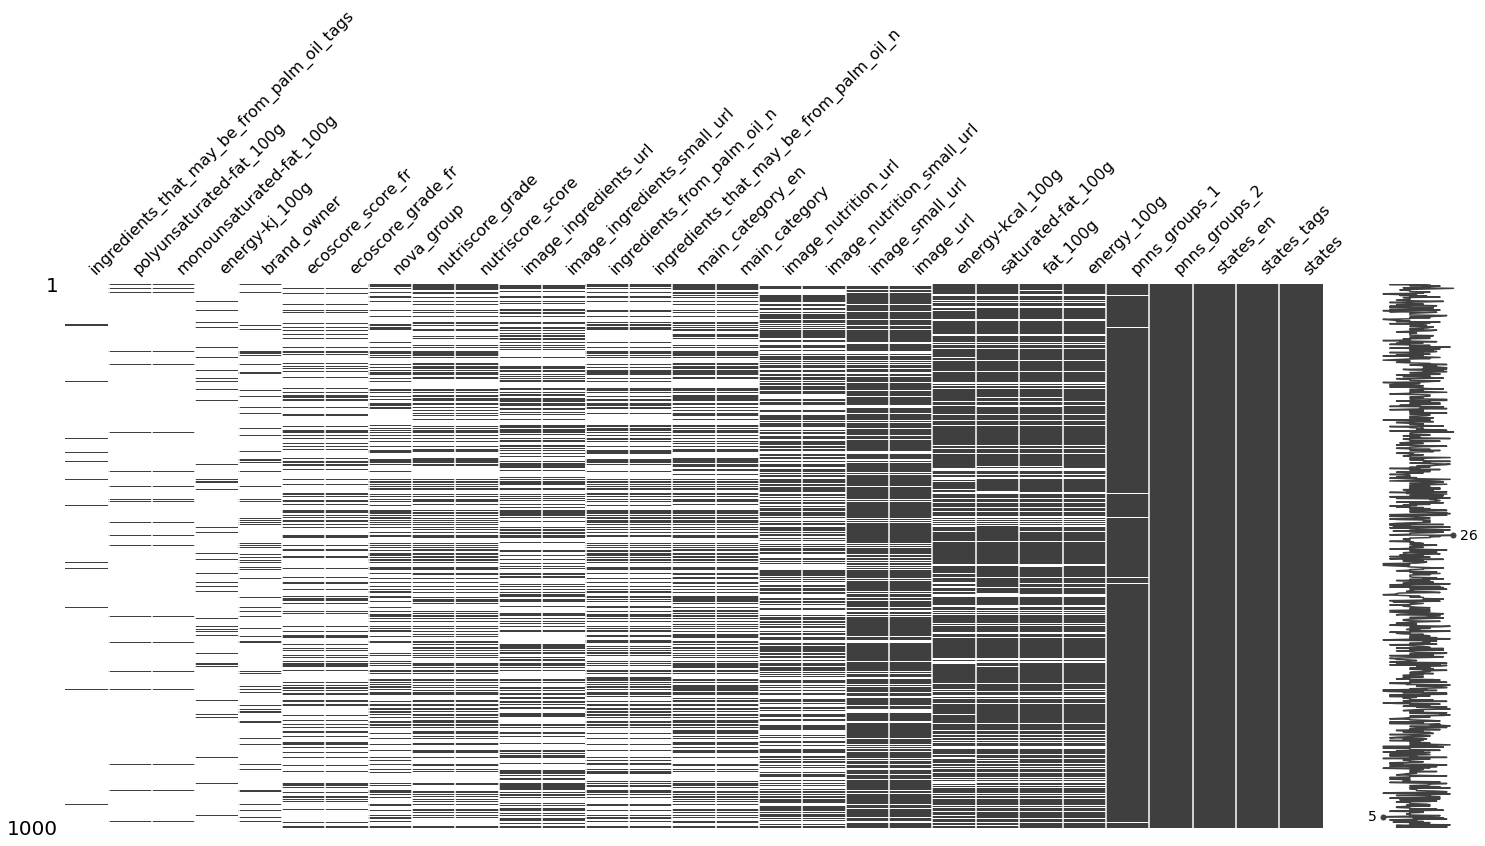

In [448]:
msno.matrix(d[keep_cols].sample(1000))

In [449]:
d[keep_cols].dropna()

,ingredients_that_may_be_from_palm_oil_tags,polyunsaturated-fat_100g,monounsaturated-fat_100g,energy-kj_100g,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,nova_group,nutriscore_grade,nutriscore_score,...,image_url,energy-kcal_100g,saturated-fat_100g,fat_100g,energy_100g,pnns_groups_1,pnns_groups_2,states_en,states_tags,states


**Aucun ligne pour laquelle toutes les valeurs sont renseignées. Séparons le df en deux comme précédemment.** 

In [453]:
d[keep_cols[:6]].dropna()

,ingredients_that_may_be_from_palm_oil_tags,polyunsaturated-fat_100g,monounsaturated-fat_100g,energy-kj_100g,brand_owner,ecoscore_score_fr
81880,e160a-beta-carotene,0.00,0.00,170.0,The Kellogg Company,35.0
88982,e160a-beta-carotene,21.43,10.71,111.0,Lipton,4.0


In [456]:
d[keep_cols[6:15]].dropna().head()

,ecoscore_grade_fr,nova_group,nutriscore_grade,nutriscore_score,image_ingredients_url,image_ingredients_small_url,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,main_category_en
70,b,4.0,a,-4.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Baguettes
334,c,4.0,b,0.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Turkey dishes
375,b,4.0,c,9.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Apple turnovers
399,b,3.0,e,23.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,Pestos
420,d,4.0,b,2.0,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,1.0,Lorraine quiche


In [457]:
d[keep_cols[15:]].dropna().head()

,main_category,image_nutrition_url,image_nutrition_small_url,image_small_url,image_url,energy-kcal_100g,saturated-fat_100g,fat_100g,energy_100g,pnns_groups_1,pnns_groups_2,states_en,states_tags,states
35,en:pear-compotes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,157.0,0.0,0.0,657.0,Fruits and vegetables,Fruits,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
72,fr:paves-de-saumon-fume,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,253.0,2.6,17.0,1059.0,Fish Meat Eggs,Fish and seafood,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
97,en:wild-boar-rillettes,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,325.0,11.0,29.0,1360.0,Salty snacks,Salty and fatty products,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
114,en:squeezed-apple-juices,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,221.0,0.1,0.5,925.0,Beverages,Fruit juices,"To be completed,Nutrition facts completed,Ingr...","en:to-be-completed,en:nutrition-facts-complete...","en:to-be-completed, en:nutrition-facts-complet..."
164,en:dietary-supplements,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,https://static.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,unknown,unknown,"To be checked,Complete,Nutrition facts complet...","en:to-be-checked,en:complete,en:nutrition-fact...","en:to-be-checked, en:complete, en:nutrition-fa..."


On peut retenir:
- energy-kcal_100g
- fat_100g
- saturated-fat_100g
- nutriscore
- ecoscore
- nova group

On continue...

<AxesSubplot:>

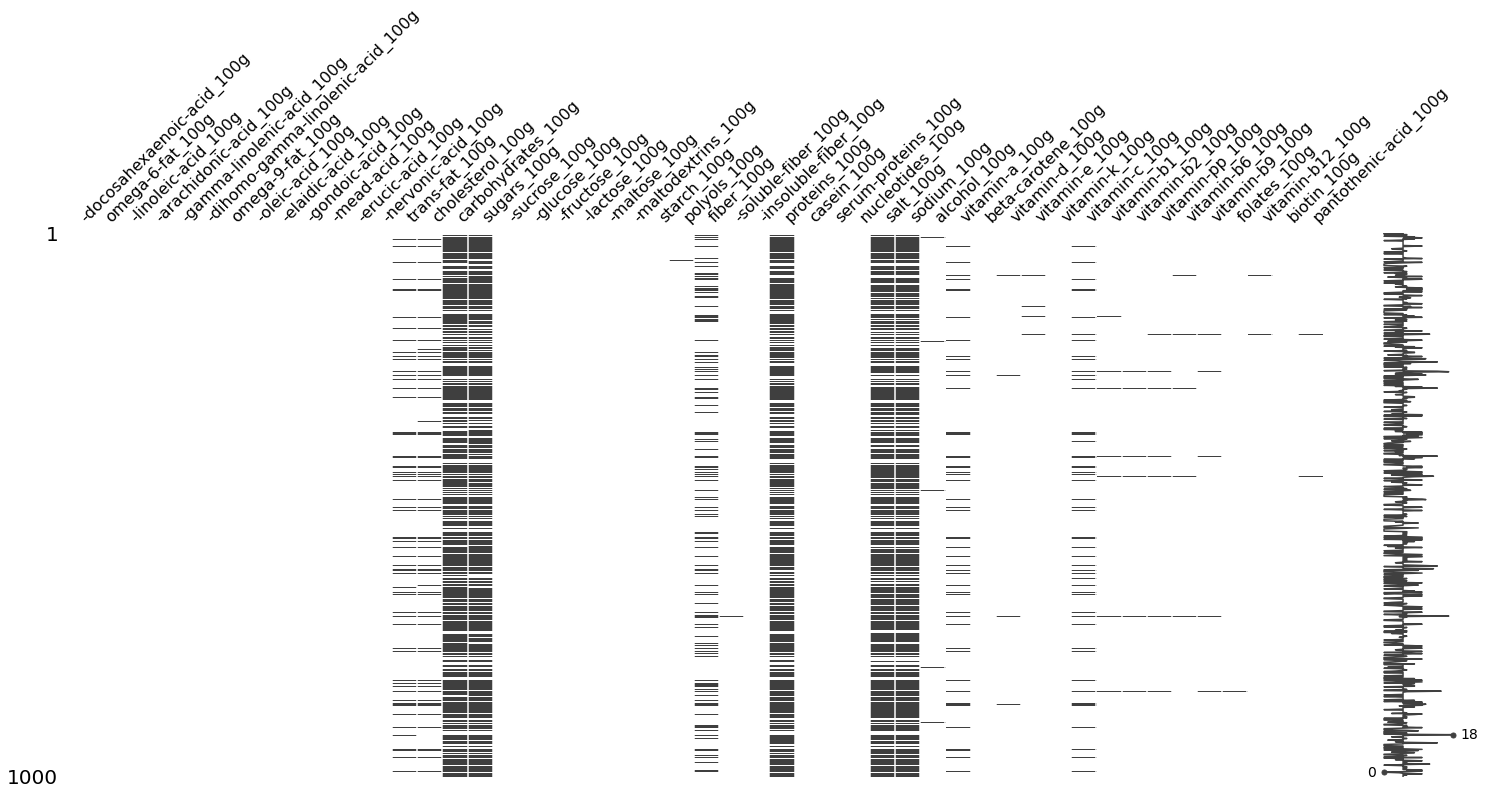

In [458]:
msno.matrix(df[df.columns[100:150]].sample(1000))

**Même traitement que précédemment...**

In [460]:
cols = df.columns[100:150]
df[df.columns[100:150]].notna().sum().sort_values()/df.shape[0]

-elaidic-acid_100g                   0.000001
-erucic-acid_100g                    0.000004
-nervonic-acid_100g                  0.000006
-dihomo-gamma-linolenic-acid_100g    0.000006
-mead-acid_100g                      0.000007
-gamma-linolenic-acid_100g           0.000008
-gondoic-acid_100g                   0.000015
nucleotides_100g                     0.000019
-maltose_100g                        0.000029
casein_100g                          0.000029
serum-proteins_100g                  0.000033
-oleic-acid_100g                     0.000034
-fructose_100g                       0.000044
beta-carotene_100g                   0.000045
-glucose_100g                        0.000049
omega-9-fat_100g                     0.000053
-arachidonic-acid_100g               0.000063
-maltodextrins_100g                  0.000070
-sucrose_100g                        0.000085
-docosahexaenoic-acid_100g           0.000115
-linoleic-acid_100g                  0.000256
starch_100g                       

In [463]:
sort_cols = df[df.columns[100:150]].notna().sum().sort_values()/df.shape[0] > 1e-2
keep_cols = sort_cols[sort_cols].index
d = df[cols]
d[keep_cols].dropna()

,alcohol_100g,vitamin-b2_100g,vitamin-b1_100g,vitamin-pp_100g,vitamin-a_100g,vitamin-c_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,salt_100g,sugars_100g,carbohydrates_100g,proteins_100g
22092,0,0.000600,0.0000,0.007667,0.000000,0.0000,0.0,0.017,3.3,0.900000,2.250000,0.0000,63.3300,13.3300
22096,0,0.000567,0.0000,0.005333,0.000000,0.0000,0.0,0.033,3.3,0.833000,2.082500,0.0000,66.6700,10.0000
27497,0,0.001371,0.0010,0.001200,0.000484,0.0194,0.0,0.000,6.5,0.581000,1.452500,29.0300,80.6500,3.2300
27625,0,0.001417,0.0010,0.001200,0.000750,0.0200,0.0,0.000,3.3,0.600000,1.500000,20.0000,80.0000,3.3300
30875,0,0.063400,0.0622,0.350000,0.000000,0.0000,0.0,0.000,18.8,0.191000,0.476000,0.0000,31.2000,50.0000
57508,0,0.000212,0.0050,0.007500,0.000000,0.0000,0.0,0.000,6.2,1.463000,3.657500,0.0000,12.5000,12.5000
81457,0,0.001518,0.0010,0.017857,0.000536,0.0214,0.0,0.000,3.6,0.714000,1.785000,10.7100,85.7100,7.1400
82221,0,0.000872,0.0010,0.010256,0.000150,0.0060,0.0,0.000,2.6,0.538000,1.345000,35.9000,84.6200,5.1300
82437,0,0.000810,0.0010,0.009524,0.000357,0.0143,0.0,0.000,7.1,0.459600,1.149000,30.9524,85.7143,7.1400
82569,0,0.001478,0.0010,0.017391,0.000522,0.0209,0.0,0.000,4.3,0.729000,1.822500,8.7000,82.6100,8.7000


**Dans un premier temps, comme on souhaite proposer des suggestions basées sur une alimentation "standard", on ne s'intéressera pas aux indicateurs spécifiques à certaines pathologies. Mais on peut garder protéines, sugars et salt, fiber pour lesquelles il y a des recommandations "générales" (non spécifiques aux personnes suivant un régime, ou atteintes d'une maladie particulière etc.)**

**On garde:**
- fiber_100g
- salt_100g
- sugars_100g
- proteins_100g

**Suite et fin...**

In [465]:
cols = df.columns[150:]
df[cols].notna().sum().sort_values()/df.shape[0]

water-hardness_100g                        5.449294e-07
glycemic-index_100g                        2.179718e-06
chlorophyl_100g                            2.724647e-06
nutrition-score-uk_100g                    4.359435e-06
beta-glucan_100g                           1.798267e-05
carnitine_100g                             2.125225e-05
choline_100g                               3.269577e-05
inositol_100g                              3.542041e-05
silica_100g                                7.574519e-05
taurine_100g                               9.808730e-05
ph_100g                                    1.057163e-04
chromium_100g                              1.089859e-04
molybdenum_100g                            1.640238e-04
collagen-meat-protein-ratio_100g           1.705629e-04
fruits-vegetables-nuts-dried_100g          1.994442e-04
fluoride_100g                              2.087080e-04
bicarbonate_100g                           2.250559e-04
caffeine_100g                              2.479

In [466]:
sort_cols = df[df.columns[150:]].notna().sum().sort_values()/df.shape[0] > 1e-2
keep_cols = sort_cols[sort_cols].index
d = df[cols]
d[keep_cols].dropna()

,potassium_100g,iron_100g,calcium_100g,nutrition-score-fr_100g
375,0.000,0.000480,0.0133,9.0
420,0.000,0.000643,0.0286,2.0
1011,1.536,0.001290,0.0000,10.0
1038,0.381,0.000810,0.1900,26.0
1078,0.244,0.000980,0.0370,-2.0
...,...,...,...,...
1828037,0.330,6.700000,0.4440,-1.0
1829672,0.399,0.010910,0.1730,2.0
1829909,0.062,0.000250,0.0460,1.0
1829944,1.118,0.008240,0.1180,-5.0


**doublon de nutrition-score-fr_100g avec nutriscore_score ?**

In [467]:
df[['nutriscore_score', 'nutrition-score-fr_100g']].dropna().head()

,nutriscore_score,nutrition-score-fr_100g
5,18.0,18.0
16,1.0,1.0
25,14.0,14.0
35,-2.0,-2.0
39,1.0,1.0


**Oui! On ne garde que la colonne la mieux remplie...**

In [469]:
df[['nutriscore_score', 'nutrition-score-fr_100g']].notna().sum().sort_values()/df.shape[0]

nutriscore_score           0.369052
nutrition-score-fr_100g    0.369054
dtype: float64

In [474]:
d = df.loc[df['nutrition-score-fr_100g'].notna(), ['nutrition-score-fr_100g', 'nutriscore_score']]
d[d.nutriscore_score.isna()]

,nutrition-score-fr_100g,nutriscore_score
526978,13.0,NaN
612395,22.0,NaN
1206325,10.0,NaN
1812374,22.0,NaN


**Ok, on ne garde que nutrition-score-fr_100g.**

### I.2.8 Conclusion

**Récapitulons:**
1. On supprime tous ls produits pour lesquels product_name n'est pas renseigné
2. On garde les colonnes suivantes:
- 'product_name'
- 'categories_tags',
- 'countries_tags',
- 'pnns_groups_2'
- serving_quantity
- energy-kcal_100g
- fat_100g
- saturated-fat_100g
- nutrition-score-fr_100g
- nutriscore_grade
- ecoscore
- nova group
- carbohydrates_100g
- fiber_100g
- salt_100g
- sugars_100g
- proteins_100g

In [23]:
df1 = df.loc[df.product_name.notna()]
cols = pd.Series(df1.columns)

In [515]:
cols.head(50)

0                          code
1                           url
2                       creator
3                     created_t
4              created_datetime
5               last_modified_t
6        last_modified_datetime
7                  product_name
8      abbreviated_product_name
9                  generic_name
10                     quantity
11                    packaging
12               packaging_tags
13               packaging_text
14                       brands
15                  brands_tags
16                   categories
17              categories_tags
18                categories_en
19                      origins
20                 origins_tags
21                   origins_en
22         manufacturing_places
23    manufacturing_places_tags
24                       labels
25                  labels_tags
26                    labels_en
27                    emb_codes
28               emb_codes_tags
29     first_packaging_code_geo
30                       cities
31      

In [516]:
cols[50:].head(50)

50                   ingredients_from_palm_oil_n
51                     ingredients_from_palm_oil
52                ingredients_from_palm_oil_tags
53       ingredients_that_may_be_from_palm_oil_n
54         ingredients_that_may_be_from_palm_oil
55    ingredients_that_may_be_from_palm_oil_tags
56                              nutriscore_score
57                              nutriscore_grade
58                                    nova_group
59                                 pnns_groups_1
60                                 pnns_groups_2
61                                        states
62                                   states_tags
63                                     states_en
64                                   brand_owner
65                             ecoscore_score_fr
66                             ecoscore_grade_fr
67                                 main_category
68                              main_category_en
69                                     image_url
70                  

In [517]:
cols[100:].head(50)

100           -docosahexaenoic-acid_100g
101                     omega-6-fat_100g
102                  -linoleic-acid_100g
103               -arachidonic-acid_100g
104           -gamma-linolenic-acid_100g
105    -dihomo-gamma-linolenic-acid_100g
106                     omega-9-fat_100g
107                     -oleic-acid_100g
108                   -elaidic-acid_100g
109                   -gondoic-acid_100g
110                      -mead-acid_100g
111                    -erucic-acid_100g
112                  -nervonic-acid_100g
113                       trans-fat_100g
114                     cholesterol_100g
115                   carbohydrates_100g
116                          sugars_100g
117                        -sucrose_100g
118                        -glucose_100g
119                       -fructose_100g
120                        -lactose_100g
121                        -maltose_100g
122                  -maltodextrins_100g
123                          starch_100g
124             

In [518]:
cols[150:].head(50)

150                                silica_100g
151                           bicarbonate_100g
152                             potassium_100g
153                              chloride_100g
154                               calcium_100g
155                            phosphorus_100g
156                                  iron_100g
157                             magnesium_100g
158                                  zinc_100g
159                                copper_100g
160                             manganese_100g
161                              fluoride_100g
162                              selenium_100g
163                              chromium_100g
164                            molybdenum_100g
165                                iodine_100g
166                              caffeine_100g
167                               taurine_100g
168                                    ph_100g
169                fruits-vegetables-nuts_100g
170          fruits-vegetables-nuts-dried_100g
171       fru

In [21]:
selected_cols = ['product_name',
                 'categories_tags',
                 'countries_tags',
                 'pnns_groups_2',
                 'serving_quantity',
                 'energy-kcal_100g',
                 'fat_100g',
                 'saturated-fat_100g',
                 'nutrition-score-fr_100g',
                 'nutriscore_grade',
                 'ecoscore_score_fr',
                 'ecoscore_grade_fr',
                 'nova_group',
                 'fiber_100g',
                 'salt_100g',
                 'sugars_100g',
                 'proteins_100g',
                 'carbohydrates_100g']

In [24]:
drop_cols = [c for c in df.columns if not c in selected_cols]
df1.drop(columns=drop_cols, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df1.head()

,product_name,categories_tags,countries_tags,serving_quantity,nutriscore_grade,nova_group,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,jeunes pousses,NaN,en:france,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vitória crackers,NaN,en:france,NaN,NaN,NaN,unknown,NaN,NaN,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,NaN
2,Cacao,NaN,en:france,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Filetes de pollo empanado,NaN,en:spain,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hamburguesas de ternera 100%,NaN,en:spain,NaN,NaN,NaN,unknown,NaN,NaN,874.9,15.1,6.10,2.6,1.0,NaN,15.7,2.1,NaN


### Création des dataframes pour chaque idée d'application

#### Première idée

Première idée d'application. Fourniture de recommandations de sélection de plats et/ou d'aliments permettant de suivre les recommandations du PNNS:
- Au moins 5 fruits et légumes par jour
- Des féculents à chaque repas selon l’appétit
- 3 produits laitiers (lait, yaourt, fromage) par jour
- 1 à 2 portions de viande, œufs et produits de la pêche par jour
- Limiter les matières grasses ajoutées, le sucre et le sel

Recommandation limitée à un combo One-dish meal + yaourt + fruits. Autre possibilité: à partir d'un aliment scanné, proposer les produits de meilleurs nutriscore et ecoscore dans leurs catégories. On va avoir besoin des apports en energie, et lipides/glucides/protides.

* energie
    - homme 2700kcal
    - femme 2200 kcal

* nutriments
    - lipides 35-40% AET (97-111g)
    - protides 10-20% AET (50-125g)
    - glucides 40-55% AET (205-340g)
    - sucres: max 100g
    - fibres: 30g



On va donc avoir besoin de renseignements concernant les apports nutritionnels et notamment l'énergie, les apports en sel/protéines/lipides et glucides et les types d'aliments. Le nutriscore et l'ecoscore pour pouvoir faire une sélection des produits les plus écologiques et sains (dans leur catégorie).

Si on décide de proposer des plats à partir de "rien", il nous faut faire un choix de pays. Donc ici on ne va choisir que les produits français, puis ensuite que les catégories "One dish meal", "Fruits" et "Milk and yoghourts"

In [26]:
# Restriction aux produits français
df_app1 = df1.loc[df1.countries_tags=="en:france"]

# Restriction aux "One dish meal", "Fruits" et "Yoghourts"
cat = ['One-dish meals','Fruits', 'Milk and yogurt', 'fruits']
df_app1 = df_app1.loc[df_app1.pnns_groups_2.isin(cat)]

# Restriction des indicateurs nutritionnels à "energy-kcal_100g", "fat_100g", "carbohydrates_100g", 
# "sugars_100g", "proteins_100g", nutriscores et ecoscores

selected_var = ["product_name", "categories_tags", "nutriscore_grade", "pnns_groups_2",
                "serving_quantity", "energy-kcal_100g", "fat_100g", "carbohydrates_100g",
                "fiber_100g", "proteins_100g", "nutrition-score-fr_100g"]
df_app1 = df_app1[selected_var]

# Reindexation
df_app1.index = pd.Index(range(0, df_app1.shape[0]))

In [27]:
# to csv
df_app1.to_csv('./df_app1.csv', index_label=False)

In [28]:
df_app1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36373 entries, 0 to 36372
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             36373 non-null  object 
 1   categories_tags          36373 non-null  object 
 2   nutriscore_grade         30768 non-null  object 
 3   pnns_groups_2            36373 non-null  object 
 4   serving_quantity         10363 non-null  float64
 5   energy-kcal_100g         28543 non-null  float64
 6   fat_100g                 32286 non-null  float64
 7   carbohydrates_100g       32287 non-null  float64
 8   fiber_100g               13916 non-null  float64
 9   proteins_100g            32406 non-null  float64
 10  nutrition-score-fr_100g  30768 non-null  float64
dtypes: float64(7), object(4)
memory usage: 3.1+ MB


#### Deuxième idée

Une deuxième idée pourrait être de donner, à partir d'un ensemble de produits scannés, les quantités de sucre, sel, gras protéines fibres absorbés, (et comparer avec les AJR?).

Aucun choix de catégorie ni de pays à faire en amont cette fois.
Sélection sur les variables nutritionnelles:
- salt_100g
- fiber_100g
- sugar_100g/carbohydrates_100g
- fat_100g
- proteins_100g

suggestion de meilleurs produits (nutriscore), pour se rapprocher des ajr.

In [24]:
# Restriction des indicateurs nutritionnels à "fat_100g", "carbohydrates_100g", 
# "sugars_100g", "proteins_100g", nutriscores
selected_var = ["product_name", "categories_tags", "nutriscore_grade", "pnns_groups_2",
                "fat_100g", "carbohydrates_100g", "sugars_100g", "proteins_100g", "nutrition-score-fr_100g"]
df_app2 = df1[selected_var]

#Reindexation
df_app2.index = pd.Index(range(0, df_app2.shape[0]))

In [25]:
# to csv
df_app2.to_csv('./df_app2.csv', index_label=False)

In [540]:
df_app2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1756398 entries, 0 to 1835099
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   product_name             object 
 1   categories_tags          object 
 2   nutriscore_grade         object 
 3   pnns_groups_2            object 
 4   fat_100g                 float64
 5   carbohydrates_100g       float64
 6   sugars_100g              float64
 7   proteins_100g            float64
 8   nutrition-score-fr_100g  float64
dtypes: float64(5), object(4)
memory usage: 134.0+ MB


#### Troisième idée

Enfin, une dernière idée pourrait être de simplement donner un meilleur équivalent en termes de nutriscore, ecoscore, nova_group etc. d'un produit scanné.

In [26]:
# Restriction des indicateurs nutritionnels à nutriscores et ecoscores.
selected_var = ['product_name',
                 'categories_tags',
                 'countries_tags',
                 'pnns_groups_2',
                 'nutrition-score-fr_100g',
                 'nutriscore_grade',
                 'ecoscore_score_fr',
                 'ecoscore_grade_fr',
                 'nova_group']

df_app3 = df1[selected_var]

#Reindexation
df_app3.index = pd.Index(range(0, df_app3.shape[0]))

In [27]:
# to csv
df_app3.to_csv('./df_app3.csv', index_label=False)

In [53]:
df_app3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756398 entries, 0 to 1756397
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   product_name             object 
 1   categories_tags          object 
 2   countries_tags           object 
 3   pnns_groups_2            object 
 4   nutrition-score-fr_100g  float64
 5   nutriscore_grade         object 
 6   ecoscore_score_fr        float64
 7   ecoscore_grade_fr        object 
 8   nova_group               float64
dtypes: float64(3), object(6)
memory usage: 120.6+ MB


In [66]:
df.loc[df.product_name=="21","url"].to_numpy()

array(['http://world-en.openfoodfacts.org/product/2000000119908/21',
       'http://world-en.openfoodfacts.org/product/8414606367757/21-mateo-bernabe'],
      dtype=object)

# II Nettoyage des datasets

**Dasn la suite, on traite uniquement l'idée d'application numéro 1**

## II.1 Chargement des datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [406]:
df_app1 = pd.read_csv("./df_app1.csv")

In [407]:
df_app1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36373 entries, 0 to 36372
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_name             36373 non-null  object 
 1   categories_tags          36373 non-null  object 
 2   nutriscore_grade         30768 non-null  object 
 3   pnns_groups_2            36373 non-null  object 
 4   ecoscore_score_fr        24727 non-null  float64
 5   ecoscore_grade_fr        24727 non-null  object 
 6   energy-kcal_100g         28543 non-null  float64
 7   fat_100g                 32286 non-null  float64
 8   carbohydrates_100g       32287 non-null  float64
 9   sugars_100g              32271 non-null  float64
 10  proteins_100g            32406 non-null  float64
 11  nutrition-score-fr_100g  30768 non-null  float64
dtypes: float64(7), object(5)
memory usage: 3.6+ MB


In [644]:
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,83.0,b,32.0,0.3,5.3,3.9,NaN,0.9,1.0
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,157.0,0.0,36.0,27.0,3.6,0.6,-2.0
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,NaN,143.0,12.7,3.9,1.0,NaN,1.9,1.0
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,NaN,235.0,15.0,1.0,1.0,NaN,24.0,17.0
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,NaN,64.0,2.3,1.8,1.4,NaN,3.7,1.0


## II.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes

### II.2.1 Valeurs typiques et atypiques des compositions énergétiques totale et par macro-nutriment

In [29]:
df_app1.describe()

,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g
count,10363.000000,28543.000000,32286.000000,32287.000000,13916.000000,32406.000000,30768.000000
mean,195.127361,144.772026,6.230863,14.412681,1.805734,5.687533,2.932332
std,294.110394,108.976674,7.520649,14.936751,2.193823,5.896560,5.631104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000
25%,100.000000,71.000000,1.515775,5.300000,0.600000,2.300000,-1.000000
50%,150.000000,115.000000,4.000000,11.400000,1.500000,4.300000,2.000000
75%,290.000000,177.000000,8.100000,16.000000,2.200000,7.400000,5.000000
max,25879.000000,1572.000000,100.000000,98.400000,77.000000,100.000000,34.000000


**Création des colonnes informant sur l'énergie (kcal) apportée par chaque macro-nutriment.**  
**Conversions:**
- 1g de lipides fournit 9 kcal
- 1g de protéines fournit 4 kcal
- 1g de glucides fournit 4 kcal
- 1g de fibres fournit 1,9 kcal

(Source: [Valeur énergétique](https://fr.wikipedia.org/wiki/Valeur_énergétique) sur Wikipédia)

In [30]:
df_app1["fat_kcal"] = df_app1["fat_100g"].apply(lambda x: x*9)
df_app1["carbohydrates_kcal"] = df_app1["carbohydrates_100g"].apply(lambda x: x*4)
df_app1["proteins_kcal"] = df_app1["proteins_100g"].apply(lambda x: x*4)
df_app1["fiber_kcal"] = df_app1["fiber_100g"].apply(lambda x: x*1.9)

In [31]:
df_app1.head()

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal
0,Salade de carottes râpées,"en:meals,en:prepared-vegetables,en:grated-carr...",b,One-dish meals,NaN,32.0,0.3,5.3,NaN,0.9,1.0,2.7,21.2,3.6,NaN
1,Compote de poire,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,NaN,157.0,0.0,36.0,3.6,0.6,-2.0,0.0,144.0,2.4,6.84
2,Salade de macedoine de légumes,"en:meals,en:prepared-vegetables,en:starters,en...",b,One-dish meals,NaN,143.0,12.7,3.9,NaN,1.9,1.0,114.3,15.6,7.6,NaN
3,CORNED BEEF,"en:canned-foods,en:meats,en:meals,en:meat-base...",d,One-dish meals,NaN,235.0,15.0,1.0,NaN,24.0,17.0,135.0,4.0,96.0,NaN
4,Salade Grecque,"en:meals,en:salads,en:prepared-salads",b,One-dish meals,NaN,64.0,2.3,1.8,NaN,3.7,1.0,20.7,7.2,14.8,NaN


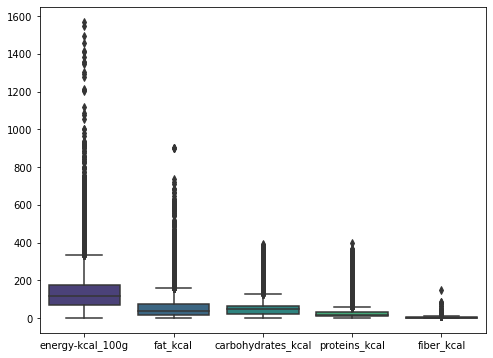

In [32]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_app1[["energy-kcal_100g", "fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]],
           palette="viridis")
plt.show()

**Retirons les outliers pour une meilleure visualisation**

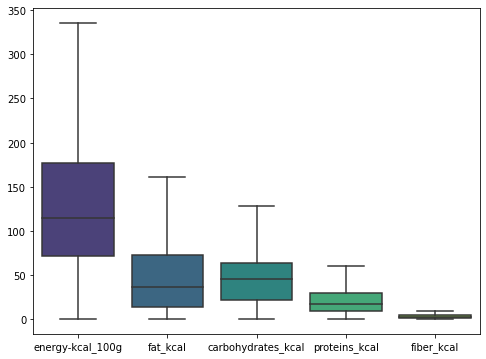

In [33]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_app1[["energy-kcal_100g", "fat_kcal", "carbohydrates_kcal", "proteins_kcal", "fiber_kcal"]],
            showfliers=False,
            ax=ax,
           palette="viridis")
plt.show()

Il va falloir traiter les outliers, et rassembler Fruits et fruits en une seule catégorie.

### II.2.2 Traitement des valeurs atypiques: cohérence des variables

On note que la somme des equivalents énergie des glucides, lipides, protéines et fibres sont en principe égales à l'energie (energy-kcal_100g).

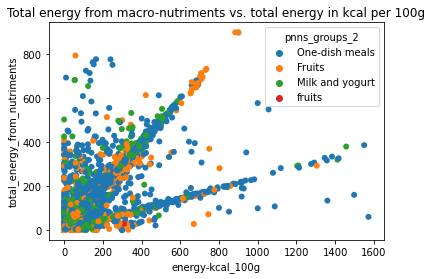

In [35]:
# Calcul de la somme dans une nouvelle colonne "total_energy_from_nutriments"
df_app1.loc[:, "total_energy_from_nutriments"] = df_app1[["fat_kcal","carbohydrates_kcal","proteins_kcal", "fiber_kcal"]].apply(lambda x: np.sum(x), axis=1)

## graphe
sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutriments",
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
               )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

**Surprise! Il semble qu'il existe plusieurs relations différentes. Selon les catégories?**

In [36]:
print("Categories: ", df_app1.pnns_groups_2.unique())

Categories:  ['One-dish meals' 'Fruits' 'Milk and yogurt' 'fruits']


1. **One-dish meals**

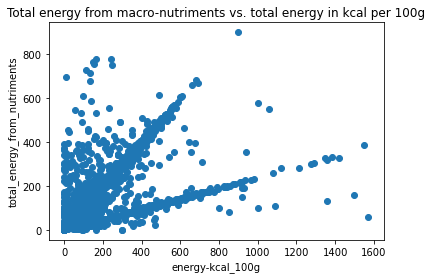

In [37]:
odm = df_app1.loc[df_app1.pnns_groups_2=="One-dish meals"]
## graphe
plt.scatter(x=odm["energy-kcal_100g"], y=odm["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

2. **Milk and yogurt**

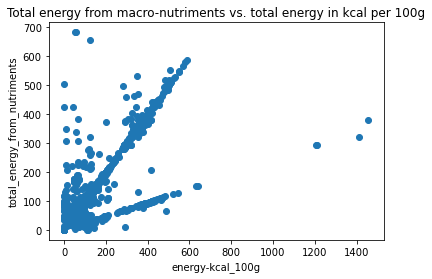

In [38]:
may = df_app1.loc[df_app1.pnns_groups_2=="Milk and yogurt"]
## graphe
plt.scatter(x=may["energy-kcal_100g"], y=may["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

3. **Fruits**

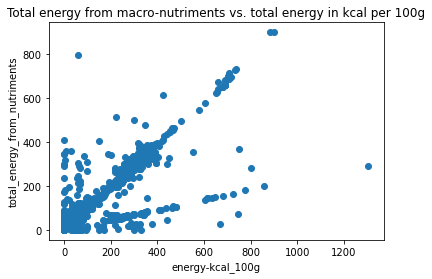

In [39]:
fru = df_app1.loc[df_app1.pnns_groups_2=="Fruits"] 
## graphe
plt.scatter(x=fru["energy-kcal_100g"], y=fru["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

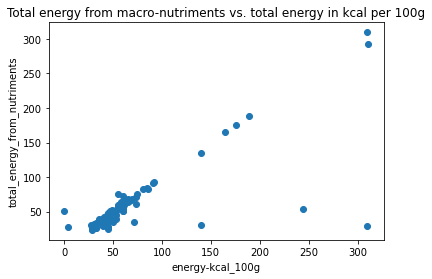

In [40]:
fru = df_app1.loc[df_app1.pnns_groups_2=="fruits"] 
## graphe
plt.scatter(x=fru["energy-kcal_100g"], y=fru["total_energy_from_nutriments"])
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")
plt.show()

**Cette "double relation" semble être présente quelle que soit la catégorie envisagée (sauf pour "fruits" mais cela résulte sans doute du faible nombre d'éléments). Essayons de déterminer les différentes relations affines qui apparaissent sur ce graphe.**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


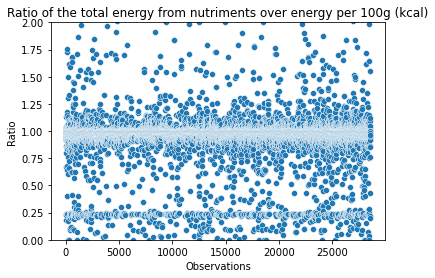

In [41]:
calculated_e = df_app1.loc[df_app1["energy-kcal_100g"].notna(), "total_energy_from_nutriments"]
actual_e = df_app1.loc[df_app1["energy-kcal_100g"].notna(), "energy-kcal_100g"]

ratio  = calculated_e/actual_e

x = range(len(ratio))

sns.scatterplot(x, ratio, markers=False)
plt.ylim([0, 2])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Donc il semblerait que les deux relations soient associées aux coefficients ~1 et ~0.25. On s'attend à observer la même chose sur chaque pnns_group.**

**Sur les One-dish meals**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


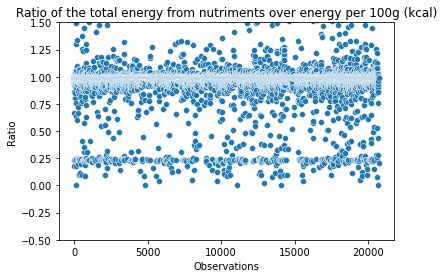

In [42]:
te_odm = odm["total_energy_from_nutriments"]
e_odm = odm["energy-kcal_100g"]

ratio_odm  = te_odm/e_odm
x = range(len(ratio_odm))

sns.scatterplot(x, ratio_odm, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Sur les Milk and yogurt**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


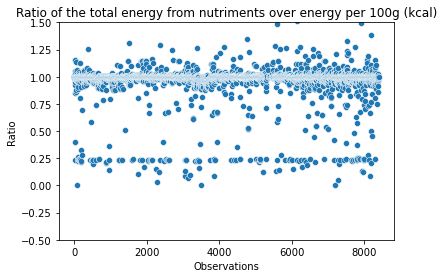

In [43]:
te_may = may["total_energy_from_nutriments"]
e_may = may["energy-kcal_100g"]

ratio_may  = te_may/e_may
x = range(len(ratio_may))

sns.scatterplot(x, ratio_may, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**Sur les fruits**

/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


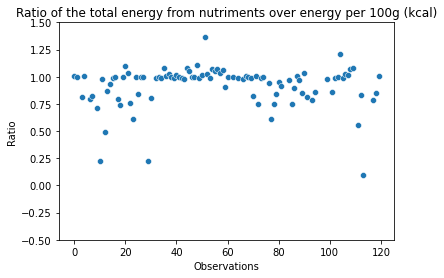

In [44]:
te_fru = fru["total_energy_from_nutriments"]
e_fru = fru["energy-kcal_100g"]

ratio_fru  = te_fru/e_fru
x = range(len(ratio_fru))

sns.scatterplot(x, ratio_fru, markers=False)
plt.ylim([-0.5, 1.5])
plt.ylabel("Ratio")
plt.title("Ratio of the total energy from nutriments over energy per 100g (kcal)")
plt.xlabel("Observations")
plt.show()

**On a donc deux relations qui se dégagent: une pour laquelle le rapport te/e vaut environ 1 (comme attendu), et l'autre pour laquelle ce rapport vaut 0.25. Explorons sur quelques produits.**

In [674]:
# Récupérons tous les produits dont la valeur "total_energy_from_nutriments" est comprise entre 0.2 et 0.3
# "energy-kcal_100g"

#mask = df_app1[["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if (x[0]<0.3*x[1] 
                                                                          and x[0]>0.2*x[1]) else False, axis=1)

#df_app1.where(mask).dropna(subset=["total_energy_from_nutriments"])

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,ecoscore_score_fr,ecoscore_grade_fr,energy-kcal_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
15,Gratin Dauphinois,"en:meals,en:gratins,en:potato-gratin,en:dauphi...",d,One-dish meals,74.0,b,591.0,8.90,12.00,3.00,NaN,2.8,16.0,80.10,48.00,11.2,NaN,139.30
37,Chicken Arrabbiata Count on us,"en:meals,en:meat-based-products,en:pasta-dishe...",b,One-dish meals,29.0,d,442.0,1.90,13.50,1.00,NaN,7.7,2.0,17.10,54.00,30.8,NaN,101.90
134,Super fruity low fat live yogurt,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,NaN,NaN,325.0,0.90,12.90,10.20,NaN,4.0,4.0,8.10,51.60,16.0,NaN,75.70
160,Beef cannelloni,"en:meats,en:meals,en:pasta-dishes,en:meat-prep...",d,One-dish meals,NaN,NaN,611.0,7.90,11.50,3.10,1.8,6.4,11.0,71.10,46.00,25.6,3.42,146.12
360,Compote Bio Pomme,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,81.0,b,240.0,0.10,12.50,11.60,NaN,0.3,-1.0,0.90,50.00,1.2,NaN,52.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,Ashoka Delhi Dal Makhani (vegan) (280G),en:meals,c,One-dish meals,NaN,NaN,480.0,6.70,9.80,0.50,4.0,4.1,3.0,60.30,39.20,16.4,7.60,123.50
36216,Soupe Vermicelle Poulet Phu Gia Vifon 50G Vietnam,"en:meals,en:soups",d,One-dish meals,NaN,NaN,362.0,3.40,15.00,5.20,NaN,2.6,15.0,30.60,60.00,10.4,NaN,101.00
36297,Kiwi Green Organic,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,88.0,b,344.0,0.70,14.70,8.80,NaN,1.2,-3.0,6.30,58.80,4.8,NaN,69.90
36325,Salade de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",b,Fruits,66.0,b,177.0,0.60,8.50,8.50,NaN,0.0,0.0,5.40,34.00,0.0,NaN,39.40


<table>
   <tr><figure>
       <td>
           <img src="./images/chicken.png", alt="Chicken Arrabbiata Count on us"/>
           <figcaption>Chicken Arrabbiata Count on us</figcaption>
           </td>
       <td>
           <img src="./images/beef_cannelloni.png", alt="Beef cannelloni"/>
           <figcaption>Beef cannelloni</figcaption>
           </td>
   </figure></tr>
   <tr><figure>
       <td>
           <img src="./images/compote_pomme.png", alt="Compote Bio Pomme"/>
           <figcaption>Compote Bio Pomme</figcaption>
           </td>
       <td>
           <img src="./images/yogurt.png", alt="Super fruity low fat live yogurt"/>
           <figcaption>Super fruity low fat live yogurt</figcaption>
           </td> 
   </figure></tr>
</table>


**Sur ces quatre produits, on peut voir qu'il s'agit d'une erreur lors du report des valeurs d'énergie: la valeur reportée est celle en kj, indiquée comme étant la valeur en kcal. Pour remédier à ce problème, il suffit donc de convertir les valeurs de kj à kcal en utilisant les conversions suivantes:**  
1 kcal = 4,1868 kJ  
1 kJ = 0,239 kcal

**Il nous faut maintenant récupérer les "bons" éléments, c'est-à-dire ceux dont la valeur "aberrante" ne résulte que d'un problème d'unité, et non ceux dont la valeur est déjà dans la bonne unité, ou bien ceux qui sont réellement aberrants. Commençons par afficher la distribution des valeurs sous forme d'un histogramme.**

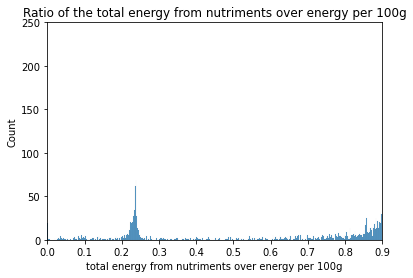

In [45]:
sns.histplot(ratio[ratio<2])
plt.xlim([0, 0.9])
plt.ylim([0, 250])
plt.title("Ratio of the total energy from nutriments over energy per 100g")
plt.xlabel("total energy from nutriments over energy per 100g")
plt.show()

**Pour récupérer les éléments auxquels on va appliquer la conversion, on ne va récupérer que les éléments compris entre 0.1 et 0.4, et regarder la moyenne et l'écart-type de cette distribution. D'après l'histogramme ci-dessus, on ne devrait pas faire trop d'erreur en procédant de cette manière**

In [46]:
sratio = ratio[ratio>0.1]
sratio = sratio[sratio<0.4]

mean = sratio.mean()
et = sratio.std()

print("Moyenne: {:.2f}\nMoyenne + ecart-type: {:.2f}\nMoyenne - ecart-type: {:.2f}".format(mean, mean+1*et, mean-1*et))

Moyenne: 0.24
Moyenne + ecart-type: 0.28
Moyenne - ecart-type: 0.19


**Donc on ne récupère que les éléments compris entre 0.19 et 0.28. Les autres seront considérés comme des valeurs aberrantes**

In [47]:
df_app1.loc[:, "ratio"] = df_app1[["total_energy_from_nutriments", "energy-kcal_100g"]].apply(lambda x: True if (x[0]<0.28*x[1] 
                                                                          and x[0]>0.19*x[1]) else False, axis=1)

In [48]:
df_app1.loc[df_app1.ratio]

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,ratio
15,Gratin Dauphinois,"en:meals,en:gratins,en:potato-gratin,en:dauphi...",d,One-dish meals,NaN,591.0,8.90,12.00,NaN,2.8,16.0,80.10,48.00,11.2,NaN,139.30,True
37,Chicken Arrabbiata Count on us,"en:meals,en:meat-based-products,en:pasta-dishe...",b,One-dish meals,NaN,442.0,1.90,13.50,NaN,7.7,2.0,17.10,54.00,30.8,NaN,101.90,True
134,Super fruity low fat live yogurt,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,NaN,325.0,0.90,12.90,NaN,4.0,4.0,8.10,51.60,16.0,NaN,75.70,True
160,Beef cannelloni,"en:meats,en:meals,en:pasta-dishes,en:meat-prep...",d,One-dish meals,NaN,611.0,7.90,11.50,1.8,6.4,11.0,71.10,46.00,25.6,3.42,146.12,True
360,Compote Bio Pomme,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,NaN,240.0,0.10,12.50,NaN,0.3,-1.0,0.90,50.00,1.2,NaN,52.10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36207,Ashoka Delhi Dal Makhani (vegan) (280G),en:meals,c,One-dish meals,NaN,480.0,6.70,9.80,4.0,4.1,3.0,60.30,39.20,16.4,7.60,123.50,True
36216,Soupe Vermicelle Poulet Phu Gia Vifon 50G Vietnam,"en:meals,en:soups",d,One-dish meals,NaN,362.0,3.40,15.00,NaN,2.6,15.0,30.60,60.00,10.4,NaN,101.00,True
36297,Kiwi Green Organic,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,NaN,344.0,0.70,14.70,NaN,1.2,-3.0,6.30,58.80,4.8,NaN,69.90,True
36325,Salade de fruits,"en:plant-based-foods-and-beverages,en:plant-ba...",b,Fruits,NaN,177.0,0.60,8.50,NaN,0.0,0.0,5.40,34.00,0.0,NaN,39.40,True


**On convertit les valeurs (Kj) en (kcal).**

In [49]:
df_app1.loc[:, "energy-kcal_100g"] = df_app1[["energy-kcal_100g", "ratio"]].apply(lambda x: x[0]*0.239 if x[1] else x[0], axis=1)

Vérifions les résultats:

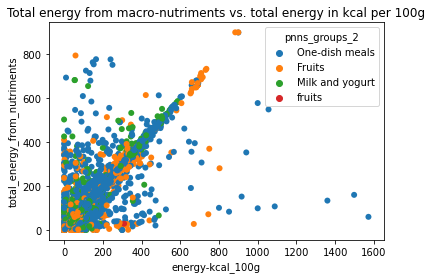

In [50]:
## graphe
sns.scatterplot(x=df_app1["energy-kcal_100g"],
                y=df_app1["total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

La transformation semble avoir fonctionné. Regardons de plus près comment se répartissent les différentes valeurs pour les variables nutritionnelles.

In [51]:
df_app1.drop(columns="ratio", inplace=True)
df_app1.describe()

,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments
count,10363.000000,28543.000000,32286.000000,32287.000000,13916.000000,32406.000000,30768.000000,32286.000000,32287.000000,32406.000000,13916.000000,36373.000000
mean,195.127361,138.958333,6.230863,14.412681,1.805734,5.687533,2.932332,56.077763,57.650723,22.750132,3.430894,122.532666
std,294.110394,97.020668,7.520649,14.936751,2.193823,5.896560,5.631104,67.685845,59.747003,23.586240,4.168264,98.447855
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,70.000000,1.515775,5.300000,0.600000,2.300000,-1.000000,13.641975,21.200000,9.200000,1.140000,57.800000
50%,150.000000,113.000000,4.000000,11.400000,1.500000,4.300000,2.000000,36.000000,45.600000,17.200000,2.850000,101.340000
75%,290.000000,171.000000,8.100000,16.000000,2.200000,7.400000,5.000000,72.900000,64.000000,29.600000,4.180000,160.780000
max,25879.000000,1572.000000,100.000000,98.400000,77.000000,100.000000,34.000000,900.000000,393.600000,400.000000,146.300000,900.000000


Comme observé plus haut, certaines valeurs aberrantes sont vraisemblablement des fautes de frappe. On peut contrôler ces outliers ainsi:
- récupérer les valeurs pour lesquelles "total_energy_from_nutriments"/"energy-kcal_100g" $\simeq$ 1
- pour les autres, regarder si val/10 ou val$\times$10 $\simeq$ "energy-kcal_100g
- si oui, corriger et garder
- si non, retirer du jeu de données

In [52]:
# Création d'une colonne outliers les cas où total_energy_from_nutriments/energy-kcal_100g
# est très différent de 1. D'abord, qu'est-ce que veut dire "très différent de 1"? Même méthode que ci-dessus.

# Distribution du ratio total_energy_from_nutriment/energy-kcal_100g
te_df = df_app1.loc[:, ["total_energy_from_nutriments", "energy-kcal_100g"]]
te_df.loc[:, "mask"] = te_df.apply(lambda x: False if x[0]==0 or x[1]==0 else True, axis=1)

te_fn = te_df.loc[te_df["mask"], "total_energy_from_nutriments"]
te = te_df.loc[te_df["mask"], "energy-kcal_100g"]
ratio = te/te_fn

ratio.describe()

count    28350.000000
mean         1.081337
std          2.393197
min          0.000800
25%          0.998635
50%          1.004632
75%          1.023496
max        318.269231
dtype: float64

In [53]:
data = ratio.sample(10000)

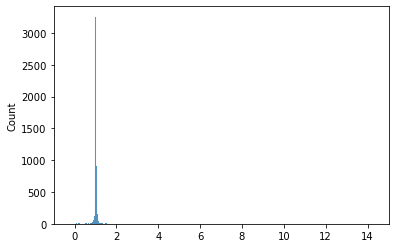

In [54]:
sns.histplot(data=data, bins=1800)
#plt.ylim([0, 5000])
plt.xlim([-1, 15])
plt.show()

Très peu de valeurs autour de 10, donc ce genre d'erreur est marginal. Regardons maintenant si beaucoup de valeurs sont telles que energy-kcal_100g est $\simeq$0.1$\times$ la vraie valeur.

In [55]:
# Création d'une colonne outliers les cas où total_energy_from_nutriments/energy-kcal_100g
# est très différent de 1. D'abord, qu'est-ce que veut dire "très différent de 1"? Même méthode que ci-dessus.

# Création de la variable total_energy_from_nutriment/energy-kcal_100g
te_df = df_app1.loc[:, ["total_energy_from_nutriments", "energy-kcal_100g"]]
te_df.loc[:, "mask"] = te_df.apply(lambda x: False if x[0]==0 or x[1]==0 else True, axis=1)

te_fn = te_df.loc[te_df["mask"], "total_energy_from_nutriments"]
te = te_df.loc[te_df["mask"], "energy-kcal_100g"]
ratio = te_fn/te

ratio.describe()

count    28350.000000
mean         1.224255
std         12.662393
min          0.003142
25%          0.977044
50%          0.995389
75%          1.001367
max       1249.999950
dtype: float64

In [56]:
data = ratio.sample(10000)

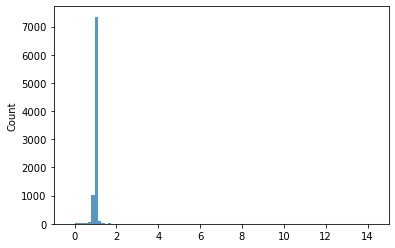

In [57]:
sns.histplot(data=data, bins=7500)
#plt.ylim([0, 5000])
plt.xlim([-1, 15])
plt.show()

Même conclusion. On va donc directement supprimer les valeurs incohérentes, c'est-à-dire celles pour lesquelles total_energy_from_nutriments est très différent de energy-kcal_100g. On commence par ne garder que les lignes pour lesquelles total_energy et energy sont différentes de 0 ou NaN, et pour lesquelles toutes les données liées aux macro-nutriments sont parfaitement renseignées. Ceci permet d'éviter d'éliminer des produit dont les valeurs energy-kcal_100g sont potentiellement correctes mais extrêmes (et qui pourraient être vues comme des valeurs aberrantes). En en gardant que les lignes où toutes les données liées aux macro-nutriments sont présentes, on réduit les risques de labeller incorrectement un produit "correct" en "aberrant" parce que sa valeur (calculée) total_energy_from_nutriments serait trop inférieure à sa valeur (donnée) energy-kcal_100g. Les lignes incomplètement renseignées seront traitées plus tard.

In [58]:
def replace_with_nan(df, target_col):
    '''Remplace les valeurs nulles de la colonne target_col du dataframe df par des NaN'''
    df.loc[:, [target_col]] = df[target_col].apply(lambda x: np.nan if x==0 else x)
    return df

In [59]:
# Création d'une copie car on va modifier le dataframe
X = df_app1.copy()

# Remplacement des valeurs nulles par des NaN pour faciliter le traitement
#X.loc[:, ["total_energy_from_nutriments"]] = \
#X["total_energy_from_nutriments"].apply(lambda x: np.nan if x==0 else x)

for col in ["total_energy_from_nutriments", "energy-kcal_100g"]:
    X = replace_with_nan(X, col)

#X.loc[:, ["energy-kcal_100g"]] = \
#X["energy-kcal_100g"].apply(lambda x: np.nan if x==0 else x)

In [60]:
def make_mask(df, target_cols, method, loc_mask=None):
    '''Crée un masque sur le dataframe. Pour créer le masque, deux méthodes possibles: une vérification 
    que toutes les colonnes target_cols sont renseignées (isna().sum()==0), ou une vérification que 
    target_cols[0]>target_cols[1].
    df: pandas.DataFrame
    target_cols: liste des colonnes sur les quelles la méthode method est appliquée
    method:"greaterthan", "isna"
    loc_mask: pd.DataFrame. Masque pour sélectionner une portion du df sur lequel appliquer method''' 
    
    df1 = df.copy()
    
    if loc_mask is None:
        loc_mask = df1.index
    
    if method=="greaterthan":
        new_mask = df.loc[loc_mask, target_cols].apply(lambda x: True if x[0]>x[1] else False, axis=1)
    elif method=="isna":
        new_mask = df.loc[loc_mask, target_cols].apply(lambda x: True if x.isna().sum()==0 else False, axis=1)
    
    # Mise à jour du dataframe
    df1.loc[:, "complete_vars"] = new_mask
    
    return df1

In [66]:
# Création du masque: True si toutes les colonnes target_cols sont renseignées, False sinon.
target_cols = ["total_energy_from_nutriments",
          "energy-kcal_100g",
          "fat_kcal",
          "carbohydrates_kcal",
          "proteins_kcal",
          "fiber_kcal"]

e_nn = X[target_cols].apply(lambda x: True if x.isna().sum()==0 else False, axis=1)

#e_nn = make_mask(X, target_cols, "isna")

# Mise à jour du dataframe
df_app1.loc[:, "e_nn"] = e_nn


# Création du masque: True si total_energy_from_nutriments > energy-kcal_100g, False sinon.
target_cols = ["total_energy_from_nutriments", "energy-kcal_100g"]
loc_mask = df_app1.e_nn==True
out_e = df_app1.loc[df_app1.e_nn==True, target_cols].apply(lambda x: True if x[0]>x[1] else False, axis=1)

#out_e = make_mask(df_app1, target_cols, "greaterthan", loc_mask=loc_mask)

# Mise à jour du dataframe
df_app1.loc[:, "out_e"] = out_e

# visualisons le résultat de ces opérations
df_app1.loc[df_app1["out_e"]==True, ["energy-kcal_100g", "total_energy_from_nutriments", "e_nn", "out_e"]].sample(10)

,energy-kcal_100g,total_energy_from_nutriments,e_nn,out_e
11437,74.0,74.23,True,True
30082,144.0,144.37,True,True
15423,118.0,118.07,True,True
12073,146.0,146.26,True,True
33115,21.0,25.30,True,True
30861,338.0,341.94,True,True
12277,305.0,306.15,True,True
23789,25.0,28.75,True,True
16950,224.0,227.71,True,True
26628,55.0,55.59,True,True


In [67]:
# Combien de valeurs incohérentes?
df_app1[df_app1.out_e==True].shape

(4283, 18)

<table>
   <tr><figure>
       <td>
           <img src="./images/Bio_pomme.png", alt="Bio_pomme"/>
           <figcaption>Bio_pomme</figcaption>
           </td>
       <td>
           <img src="./images/quinoa-pois-chiches.png", alt="quinoa-pois-chiches"/>
           <figcaption>quinoa-pois-chiches</figcaption>
           </td>
   </figure></tr>
</table>
Erreurs d'arrondis?

<table>
    <tr><figure>
       <td>
           <img src="./images/pina-rodajas_1.png", alt="pina-rodajas_1"/>
           <figcaption>Piña Rodajas</figcaption>
           </td>
       <td>
           <img src="./images/pina-rodajas_2.png", alt="pina-rodajas_2"/>
           <figcaption>Piña Rodajas (2)</figcaption>
           </td> 
   </figure></tr>
</table>

Erreur lors du report des valeurs: présence de deux étiquettes pour ce produit qui proviennent vraisemblablement de deux produits différents!

<table>
    <tr><figure>
       <td>
           <img src="./images/makdous-eggplant.png", alt="makdous-eggplant"/>
           <figcaption>Makdous eggplant</figcaption>
       </td>
   </figure></tr>
</table>

Parfois la somme des valeurs des macro-nutriments ne correspond tout simplement pas à la valeur de l'énergie.

Il y a un nombre non-négligeable de valeurs incohérentes. On peut de plus voir qu'il y a deux "types" de valeurs aberrantes: celles probablement dues à des erreurs d'arrondis, d'autres plus franchement "aberrantes". On ne va donc pas retirer toutes les valeurs incohérentes comme définies ci-dessus, mais:
1. On va arrondir les valeurs calculées à l'entier inférieur
2. utiliser comme précédemment la méthode mean-std.

In [68]:
# On arrondit à l'entier inférieur
rounded_val = df_app1["total_energy_from_nutriments"].apply(lambda x: np.floor(x))
df_app1.loc[:, "total_energy_from_nutriments"] = rounded_val

In [69]:
# Nouveau bilan sur les valeurs incohérentes: on reprend la manipulation précédente 
# On supprime les données pour lesquelles total_energy_from_nutriments > energy-kcal_100g

# Création du masque: True si total_energy_from_nutriments > energy-kcal_100g, False sinon.
target_cols = ["total_energy_from_nutriments", "energy-kcal_100g"]
loc_mask = df_app1.e_nn==True
out_e = df_app1.loc[df_app1.e_nn==True, target_cols].apply(lambda x: True if x[0]>x[1] else False, axis=1)

#out_e = make_mask(df_app1, target_cols, "greaterthan", loc_mask=loc_mask)

# Mise à jour du dataframe
df_app1.loc[:, "out_e"] = out_e

#out_e = df_app1.loc[df_app1.e_nn==True, 
#                    ["total_energy_from_nutriments", "energy-kcal_100g"]].apply(
#    lambda x: True if x[0]>x[1] else False, axis=1)
#df_app1.loc[:, "out_e"] = out_e

In [70]:
# visualisons le résultat de ces opérations
df_app1.loc[df_app1["out_e"]==True, ["energy-kcal_100g", "total_energy_from_nutriments", "e_nn", "out_e"]].sample(10)

,energy-kcal_100g,total_energy_from_nutriments,e_nn,out_e
29906,74.0,76.0,True,True
8980,128.0,130.0,True,True
18121,180.0,183.0,True,True
28551,214.0,395.0,True,True
22816,281.0,346.0,True,True
33045,108.0,186.0,True,True
14881,97.0,99.0,True,True
12561,108.0,117.0,True,True
33729,170.0,175.0,True,True
11047,129.0,130.0,True,True


In [71]:
# Combien de valeurs incohérentes?
df_app1[df_app1.out_e==True].shape

(1965, 18)

Arrondir les valeurs total_energy_from_nutriments a permi de réduire le nombre de valeurs aberrantes d'un facteur 2!

On s'attaque au filtrage des "bonnes" et "mauvaises" valeurs en regardant la distribution de la différence entre total_energy... et energy-kcal_100g.

In [72]:
# On crée la distribution représentant la différence entre total_energy... et energy_...
calculated_e = df_app1.loc[df_app1.e_nn==True, "total_energy_from_nutriments"]
actual_e = df_app1.loc[df_app1.e_nn==True, "energy-kcal_100g"]
diff = pd.Series(actual_e-calculated_e, name="diff")

diff.describe()

count    11048.000000
mean        -0.138180
std         25.759657
min       -735.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        902.000000
Name: diff, dtype: float64

In [73]:
diff.median()

1.0

**Affichons la distribution**

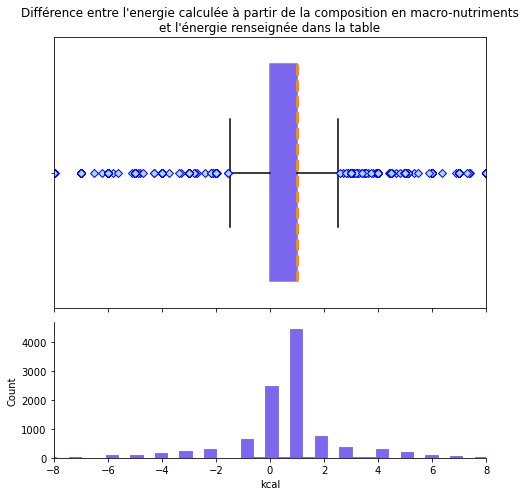

In [74]:
fig,(ax,ax2) = plt.subplots(nrows=2,sharex=True,figsize=(7,7),gridspec_kw={'height_ratios':[2,1]})
medianprops=dict(color="darkorange", linewidth=3, linestyle="--")
boxprops = dict(facecolor="mediumslateblue", edgecolor="mediumslateblue")
flierprops = dict(marker='D', markerfacecolor='lightblue', markersize=5,
                  linestyle='none', markeredgecolor='blue')  
whiskerprops = dict(color="black")
capprops = dict(color="black")
# Plot l'histogramme de la distribution
sns.boxplot(x=diff,
            orient="h",
            showfliers=True,
            color="blue",
            boxprops=boxprops,
            medianprops=medianprops,
            whiskerprops=whiskerprops,
            flierprops=flierprops,
            capprops=capprops,
            ax=ax
           )
ax.set_xlim([-10, 10])
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title('''Différence entre l'energie calculée à partir de la composition en macro-nutriments
et l'énergie renseignée dans la table''');

# Trace un boxplot aligné
sns.histplot(data=diff,
             bins=3600,
             facecolor="mediumslateblue",
             edgecolor="mediumslateblue"
            )
ax2.set_xlim([-8, 8])
ax2.set_xlabel("kcal")
      
sns.despine(ax=ax2)
fig.tight_layout()    
plt.show()

In [75]:
print("mean + std = {:.2f}, mean-std = {:.2f}".format(diff.mean()+diff.std(), diff.mean()-diff.std()))

mean + std = 25.62, mean-std = -25.90


$\hookrightarrow$ on retire les outliers, c'est-à-dire les valeurs pour lesquelles diff $\geq$ 25.62 et diff $\leq$ -25.90

In [76]:
# Ajout d'une colonne contenant la valeur de la différence entre l'énergie calculée  et l'énergie renseignée.
df_app1.loc[:, "diff"] = diff
df_app1.sample(10)

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff
12349,Lait écrémé,"en:dairies,en:milks,en:homogenized-milks,en:uh...",b,Milk and yogurt,250.0,37.0,0.5,4.8,0.0,3.2,0.0,4.5,19.200000,12.800000,0.00,36.0,True,False,1.0
20325,Quenelles Lyonnaise de Brochet,"en:meals,en:meals-with-fish,fr:quenelles,en:fi...",d,One-dish meals,NaN,229.0,15.0,15.0,NaN,8.5,15.0,135.0,60.000000,34.000000,NaN,229.0,False,NaN,NaN
13671,Bifidus,"en:dairies,en:fermented-foods,en:fermented-mil...",NaN,Milk and yogurt,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN
20694,Framboises,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Fruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False,NaN,NaN
4991,Poulet cèpes à la crème,"en:canned-foods,en:meals,en:meat-based-product...",a,One-dish meals,200.0,80.0,3.2,7.0,1.0,5.3,-1.0,28.8,28.000000,21.200000,1.90,79.0,True,False,1.0
624,Le yaourt à la grecque,"en:dairies,en:fermented-foods,en:fermented-mil...",a,Milk and yogurt,NaN,65.0,2.0,6.0,NaN,5.0,-1.0,18.0,24.000000,20.000000,NaN,62.0,False,NaN,NaN
19810,Puree de pomme sans sucres ajoutes,"en:plant-based-foods-and-beverages,en:plant-ba...",a,Fruits,NaN,51.0,0.0,12.0,1.7,0.0,-4.0,0.0,48.000000,0.000000,3.23,51.0,True,False,0.0
2004,Yaourt Fraise,"en:dairies,en:fermented-foods,en:fermented-mil...",c,Milk and yogurt,250.0,90.0,1.3,16.0,0.2,3.2,3.0,11.7,64.000000,12.800000,0.38,88.0,True,False,2.0
35389,Tortilla aux pommes de terre et oignons,"en:meals,en:spanish-omelettes",c,One-dish meals,NaN,132.0,6.5,13.0,NaN,4.0,3.0,58.5,52.000000,16.000000,NaN,126.0,False,NaN,NaN
32340,La Brandade de morue,"en:meals,en:meals-with-fish,en:cod-brandade",a,One-dish meals,NaN,158.0,10.0,7.7,NaN,8.2,-1.0,90.0,30.799999,32.799999,NaN,153.0,False,NaN,NaN


In [77]:
# Vérification qu'il n'y a pas de valeur manquante pour diff 
df_app1.loc[df_app1["diff"].isna() & df_app1.e_nn==True]

,product_name,categories_tags,nutriscore_grade,pnns_groups_2,serving_quantity,energy-kcal_100g,fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,nutrition-score-fr_100g,fat_kcal,carbohydrates_kcal,proteins_kcal,fiber_kcal,total_energy_from_nutriments,e_nn,out_e,diff


In [78]:
# Création d'une copie du dataframe
df_app1_no = df_app1.copy()

# Sélection des valeurs cohérentes grâce à la variable diff
df_app1_no = df_app1_no.loc[np.abs(df_app1_no["diff"]-diff.mean())<diff.std()]

df_app1_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10831 entries, 1 to 36368
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   product_name                  10831 non-null  object 
 1   categories_tags               10831 non-null  object 
 2   nutriscore_grade              10321 non-null  object 
 3   pnns_groups_2                 10831 non-null  object 
 4   serving_quantity              4958 non-null   float64
 5   energy-kcal_100g              10831 non-null  float64
 6   fat_100g                      10831 non-null  float64
 7   carbohydrates_100g            10831 non-null  float64
 8   fiber_100g                    10831 non-null  float64
 9   proteins_100g                 10831 non-null  float64
 10  nutrition-score-fr_100g       10321 non-null  float64
 11  fat_kcal                      10831 non-null  float64
 12  carbohydrates_kcal            10831 non-null  float64
 13  p

**Affichage du résultat du filtrage**

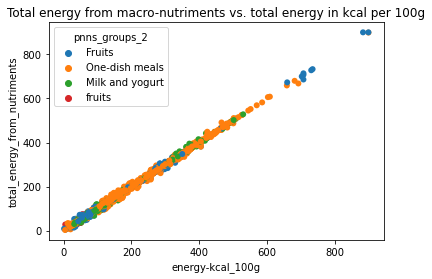

In [79]:
## graphe
sns.scatterplot(x=df_app1_no["energy-kcal_100g"],
                y=df_app1_no["total_energy_from_nutriments"],
                data=df_app1_no,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

**Ainsi on n'a gardé que les valeurs cohérentes et dont les valeurs pour les macro-nutriments sont totalement renseignées:**

In [80]:
print(df_app1_no["e_nn"].unique())

[ True]


### II.2.4 Fusion des catégories Fruits et fruits

Sur le dataframe nettoyé:

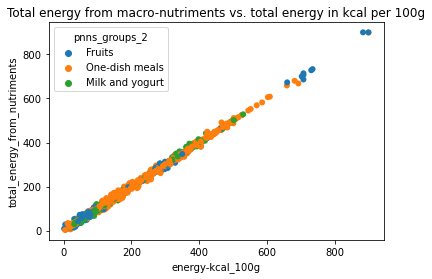

In [81]:
df_app1_no.loc[:, "pnns_groups_2"] = df_app1_no["pnns_groups_2"].apply(lambda x: "Fruits" if x=='fruits' else x)

## graphe
sns.scatterplot(x=df_app1_no["energy-kcal_100g"],
                y=df_app1_no["total_energy_from_nutriments"],
                data=df_app1_no,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

Sur le dataframe original:

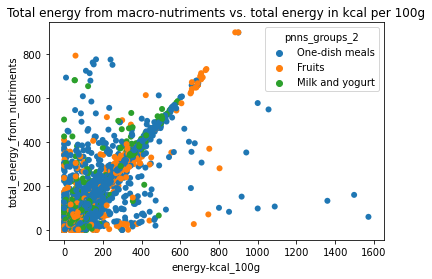

In [82]:
df_app1.loc[:, "pnns_groups_2"] = df_app1["pnns_groups_2"].apply(lambda x: "Fruits" if x=='fruits' else x)

## graphe
sns.scatterplot(x=df_app1["energy-kcal_100g"],
                y=df_app1["total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy in kcal per 100g")


plt.show()

**On nettoie le dataframe original**

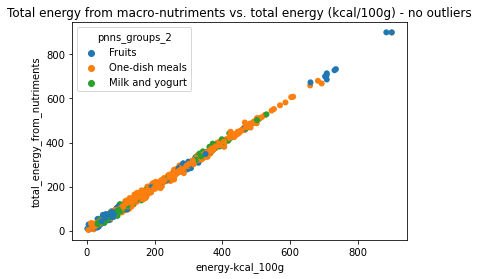

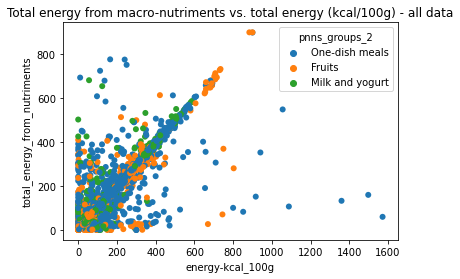

In [83]:
Y = df_app1.loc[df_app1.e_nn==True]
drop_index = Y.loc[np.abs(Y["diff"]-diff.mean())>diff.std()].index
df_app1.drop(index=drop_index, inplace=True)

## graphe
sns.scatterplot(x=df_app1.loc[df_app1.e_nn==True, "energy-kcal_100g"],
                y=df_app1.loc[df_app1.e_nn==True, "total_energy_from_nutriments"],
                data=df_app1.loc[df_app1.e_nn==True],
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - no outliers")


plt.show()

## graphe
sns.scatterplot(x=df_app1.loc[:, "energy-kcal_100g"],
                y=df_app1.loc[:, "total_energy_from_nutriments"],
                data=df_app1,
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - all data")

plt.show()

In [84]:
df_app1_no.to_csv("./df_app1_no.csv", index_label=False)
df_app1.to_csv("./df_app1.csv", index_label=False)

<AxesSubplot:>

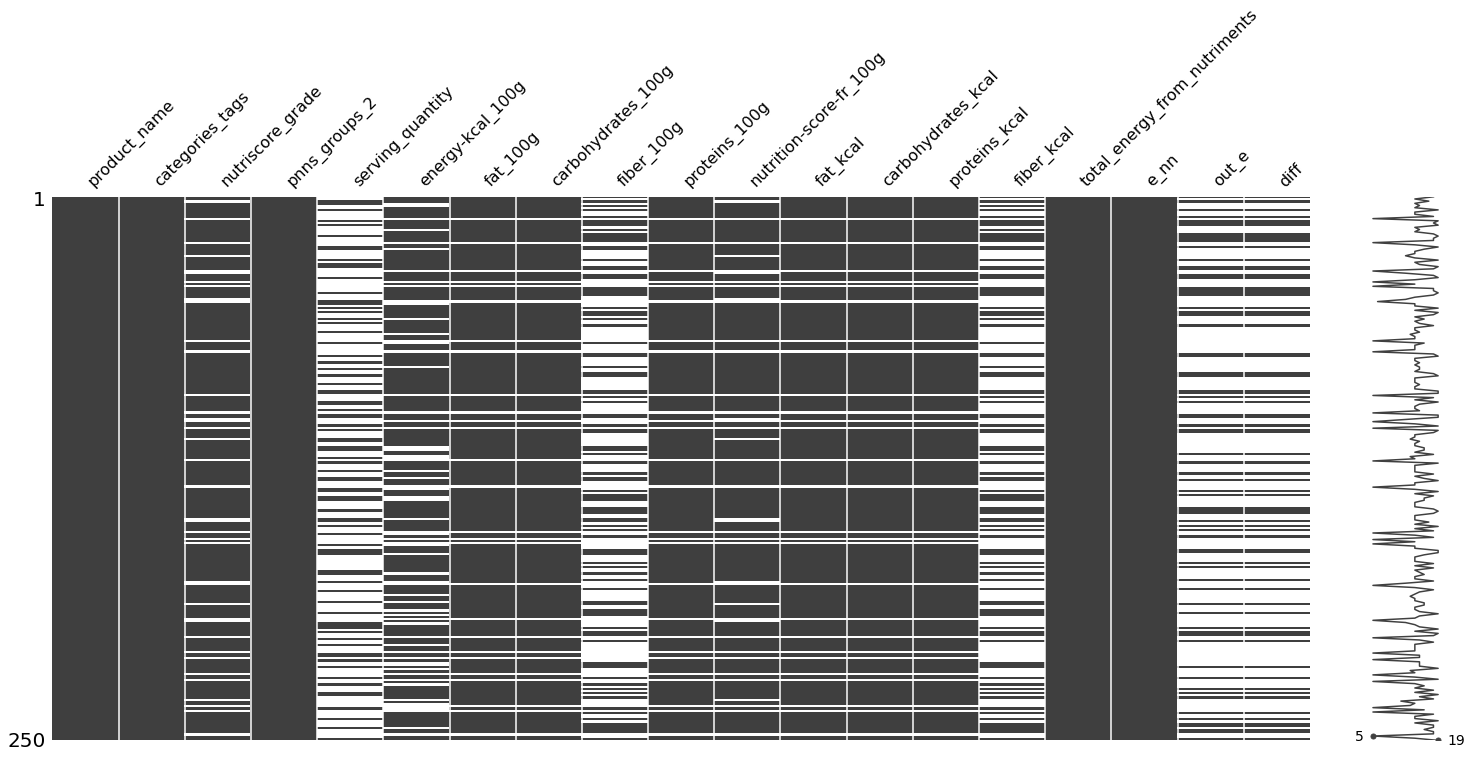

In [85]:
msno.matrix(df_app1.sample(250))

In [86]:
df_app1.dropna(subset=["fiber_kcal"], inplace=True)

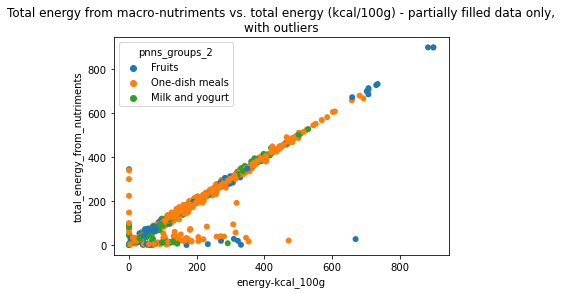

In [87]:
## graphe
sns.scatterplot(x=df_app1.loc[:, "energy-kcal_100g"],
                y=df_app1.loc[:, "total_energy_from_nutriments"],
                data=df_app1,                
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - partially filled data only,\nwith outliers")


plt.show()

### II.3.3 Nettoyage des valeurs aberrantes (bis)

In [88]:
# On crée la distribution représentant la différence entre total_energy... et energy_...
calculated_e = df_app1.loc[:, "total_energy_from_nutriments"]
actual_e = df_app1.loc[:, "energy-kcal_100g"]
diff = pd.Series(actual_e-calculated_e, name="diff")

In [89]:
# Mise à jour de la colonne diff
df_app1.loc[:, "diff"] = diff

Y = df_app1.copy()
drop_index = Y.loc[np.abs(Y["diff"]-diff.mean())>diff.quantile(0.95)].index # utilisation du 95ème percentile 
                                                                            # plutôt que l'écart-type, trop 
                                                                            # large à cause des outliers
Y.drop(index=drop_index, inplace=True)

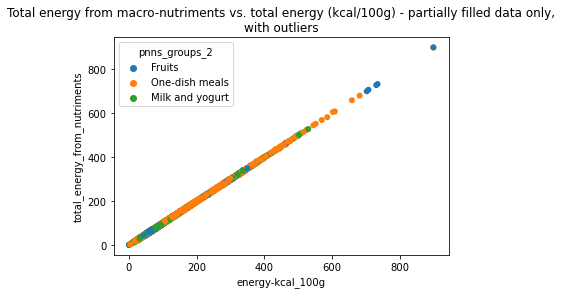

In [90]:
## graphe
sns.scatterplot(x=Y.loc[:, "energy-kcal_100g"],
                y=Y.loc[:, "total_energy_from_nutriments"],
                data=Y,                
                linewidth=0,
                hue="pnns_groups_2"
           )
plt.xlabel("energy-kcal_100g")
plt.ylabel("total_energy_from_nutriments")
plt.title("Total energy from macro-nutriments vs. total energy (kcal/100g) - partially filled data only,\nwith outliers")


plt.show()

In [91]:
Y.index = pd.Index(range(0, len(Y)))
Y.iloc[Y.total_energy_from_nutriments.idxmax()]

product_name                                             Huile de pépin de raisin
categories_tags                 en:plant-based-foods-and-beverages,en:plant-ba...
nutriscore_grade                                                                c
pnns_groups_2                                                              Fruits
serving_quantity                                                              NaN
energy-kcal_100g                                                              900
fat_100g                                                                      100
carbohydrates_100g                                                              0
fiber_100g                                                                      0
proteins_100g                                                                   0
nutrition-score-fr_100g                                                         6
fat_kcal                                                                      900
carbohydrates_kc

Mise à jour du dataframe

In [92]:
df_app1.drop(index=drop_index, inplace=True)

Export au format csv

In [93]:
df_app1.to_csv("./df_app1_clean.csv", index_label=False)

In [94]:
df_app1.shape

(12733, 19)

# III Automatisation des traitements

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mticker
#from mticker import AutoMinorLocator
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno

# Module pour le nettoyage du notebook.
import functions_p3 as fp3

## III.1 Chargement des données et sélection des variables

In [20]:
# dataset à analyser
dataset = "./en.openfoodfacts.org.products.csv"

# variables retenues pour l'analyse
selected_cols = ['product_name',
                 'url',
                 'categories_tags',
                 'countries_tags',
                 'serving_quantity',
                 'pnns_groups_2',
                 'energy-kcal_100g',
                 'fat_100g',
                 'nutrition-score-fr_100g',
                 'nutriscore_grade',
                 'fiber_100g',
                 'proteins_100g',
                 'carbohydrates_100g']

# restriction aux pays pour lesquels countries_tags="en:france"
restr="en:france"

# Chargement du dataset, sélection des variable (colonnes) et restriction aux countries_tags="en:france"
df1 = fp3.load_select(dataset, selected_cols, restr)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3337: DtypeWarning: Columns (0,8,13,19,20,21,22,23,27,28,29,31,38,47,52,55,64,134) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [21]:
# Restriction aux "One dish meal", "Fruits" et "Yoghourts"
selected_groups = ['One-dish meals','Fruits', 'Milk and yogurt', 'fruits']
df1 = df1.loc[df1.pnns_groups_2.isin(selected_groups)]
    
###### fusion des pnns_groups "Fruits" et "fruits"
df1.loc[:, "pnns_groups_2"] = df1["pnns_groups_2"].apply(lambda x: "Fruits" if x=='fruits' else x)

##### Ecriture du dataframe dans un fichier csv
df1.to_csv('./df1.csv', index_label=False)

Matrice de remplissage

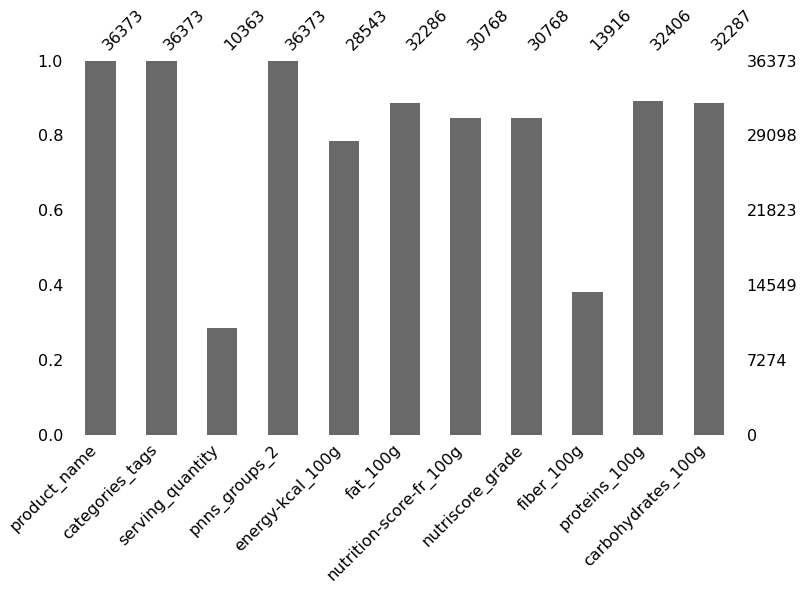

In [5]:
msno.bar(df1, figsize=(12, 8))
plt.gcf().subplots_adjust(bottom=0.25, top=0.9)
plt.savefig("./graphes/alldata_fillmat.png", dpi=300)
plt.show()

## III.2 Nettoyage du jeu de données: valeurs incohérentes et/ou extrêmes

In [31]:
df1 = pd.read_csv("./df1.csv")

### III.2.1 Conversion des valeurs en grammes en valeurs en kcal

In [32]:
# Colonnes sur lesquelles opérer les conversions
start_cols = ["fat_100g", "carbohydrates_100g", "proteins_100g", "fiber_100g"]

# Colonnes à créer avec le coefficient de conversion g --> kcal associé
new_cols = [("fat_kcal", 9), ("carbohydrates_kcal", 4), ("proteins_kcal", 4), ("fiber_kcal", 1.9)]

# Conversions et créations des colonnes
for (nc, sc) in zip(new_cols, start_cols):
    df1 = fp3.weight_to_energy(df1, sc, nc[0], nc[1])

    
# Calcul de la somme des valeurs obtenues pour chaque ligne et création d'une nouvelle colonne
# "total_energy_from_nutriments"
df1.loc[:, "total_energy_from_nutrients"] = df1[["fat_kcal","carbohydrates_kcal","proteins_kcal", "fiber_kcal"]].apply(lambda x: np.sum(x), axis=1)

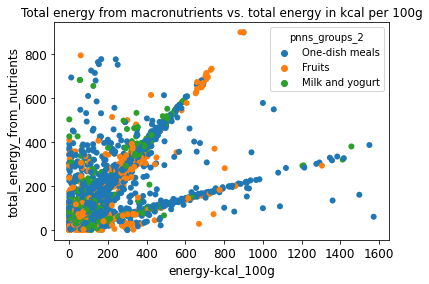

In [37]:
## graphe

# fontsize
fs = 12

fig, ax = plt.subplots()

sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutrients",
                data=df1,
                linewidth=0,
                hue="pnns_groups_2",
                ax=ax
               )
plt.xlabel("energy-kcal_100g", fontsize=fs)
plt.ylabel("total_energy_from_nutrients", fontsize=fs)
ax.tick_params(axis="y", labelsize=fs)
ax.tick_params(axis="x", labelsize=fs)
plt.title("Total energy from macronutrients vs. total energy in kcal per 100g", fontsize=12)
plt.savefig("./graphes/kj_kcal_1.png", dpi=300)
plt.show()

### III.2.2 Nettoyage des valeurs aberrantes (1): conversion en kcal des valeurs données en kJ

In [34]:
## Calcul du ratio de l'énergie calculée à partir des valeurs de macronutriments sur l'énergie renseignée
col2="energy-kcal_100g"
col1="total_energy_from_nutrients"
ratio = fp3.create_distrib(df1, col1=col1, col2=col2, reverse_cols=False, method="ratio", mask="notna")

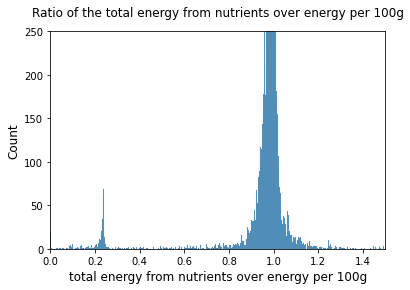

In [35]:
sns.histplot(ratio[ratio<2])
plt.xlim([0, 1.5])
plt.ylim([0, 250])
plt.title("Ratio of the total energy from nutrients over energy per 100g", pad=15)
plt.xlabel("total energy from nutrients over energy per 100g", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.savefig("./graphes/ratio.png", dpi=300)
plt.show()

In [39]:
# on ne garde dans la Series ratio que les valeurs comprises entre 0.1 et 0.4. Les valeurs intéressantes 
# se trouvent vers 0.25 et ainsi on peut calculer une moyenne et un écart-type raisonnables sur cette 
# distribution
ratio = ratio[(ratio>0.1) & (ratio<0.4)]

# Moyenne et écart-type de la "distribution" ratio
mean = ratio.mean()
sigma = ratio.std()

# cut-off associés
cut_off_high = mean + sigma
cut_off_low = mean - sigma

df1 = fp3.joule_to_kcal(df1, "energy-kcal_100g", "total_energy_from_nutrients", cut_off_high, cut_off_low)

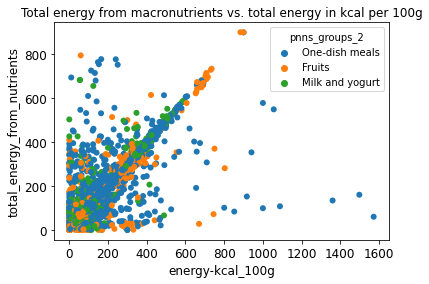

In [40]:
## graphe

# fontsize
fs = 12

fig, ax = plt.subplots()

sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutrients",
                data=df1,
                linewidth=0,
                hue="pnns_groups_2",
                ax=ax
               )
plt.xlabel("energy-kcal_100g", fontsize=fs)
plt.ylabel("total_energy_from_nutrients", fontsize=fs)
ax.tick_params(axis="y", labelsize=fs)
ax.tick_params(axis="x", labelsize=fs)
plt.title("Total energy from macronutrients vs. total energy in kcal per 100g", fontsize=fs)
plt.savefig("./graphes/kj_kcal_2.png", dpi=300)
plt.show()

### III.2.3 Nettoyage des valeurs aberrantes (2): sélection des individus non aberrants par la différence entre énergie calculée et énergie renseignée

In [41]:
# Remplacement des valeurs nulles par des NaN pour faciliter le traitement
for col in ["total_energy_from_nutrients", "energy-kcal_100g"]:
    df1 = fp3.replace_with_nan(df1, col)

# On arrondit les valeurs de total_energy_from_nutriments.
rounded_val = df1["total_energy_from_nutrients"].apply(lambda x: np.round(x))
df1.loc[:, "total_energy_from_nutrients"] = rounded_val

# Création de la colonne complete_vars: True si toutes les colonnes target_cols sont renseignées, False sinon.
target_cols = ["total_energy_from_nutrients",
          "energy-kcal_100g",
          "fat_kcal",
          "carbohydrates_kcal",
          "proteins_kcal",
          "fiber_kcal"]
df1 = fp3.make_mask(df1, target_cols, "isna")

# On crée la distribution représentant la différence total_energy_from_nutriments - energy-kcal_100g
# Cette distribution n'est calculée que sur les lignes pour lesquelles complete_vars est True, c'est-à-dire
# les lignes pour lesquelles toutes les données sont renseignées.
diff = fp3.create_distrib(df1, mask="complete_vars")

# Ajout d'une colonne contenant la valeur de la différence entre l'énergie calculée  et l'énergie renseignée.
df1.loc[:, "diff"] = diff

In [42]:
# Création d'un dataframe ne contenant que les bonnes valeurs
df1_no = df1.loc[df1.complete_vars==True].copy()
df1_no = df1_no.loc[np.abs(df1_no["diff"]-diff.mean())<2*diff.quantile(0.95)] # On ne conserve que les valeurs 
                                                                              # situées à moins de 10 unités de
                                                                              # la moyenne.

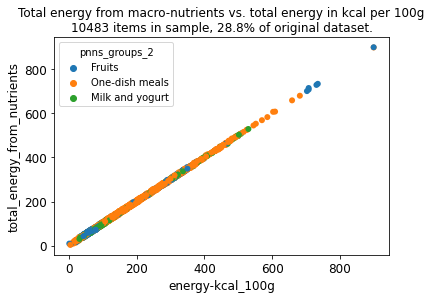

In [43]:
## graphe

# fontsize
fs = 12

fig, ax = plt.subplots()
sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutrients",
                data=df1_no,
                linewidth=0,
                hue="pnns_groups_2",
                ax=ax
               )
plt.xlabel("energy-kcal_100g", fontsize=fs)
plt.ylabel("total_energy_from_nutrients", fontsize=fs)
ax.tick_params(axis="y", labelsize=fs)
ax.tick_params(axis="x", labelsize=fs)
plt.title('''Total energy from macro-nutrients vs. total energy in kcal per 100g
{} items in sample, {:.1f}% of original dataset.'''.format(df1_no.shape[0],
                                                                          100*df1_no.shape[0]/df1.shape[0]))
plt.savefig("./graphes/no_1.png", dpi=300)
plt.show()

<AxesSubplot:>

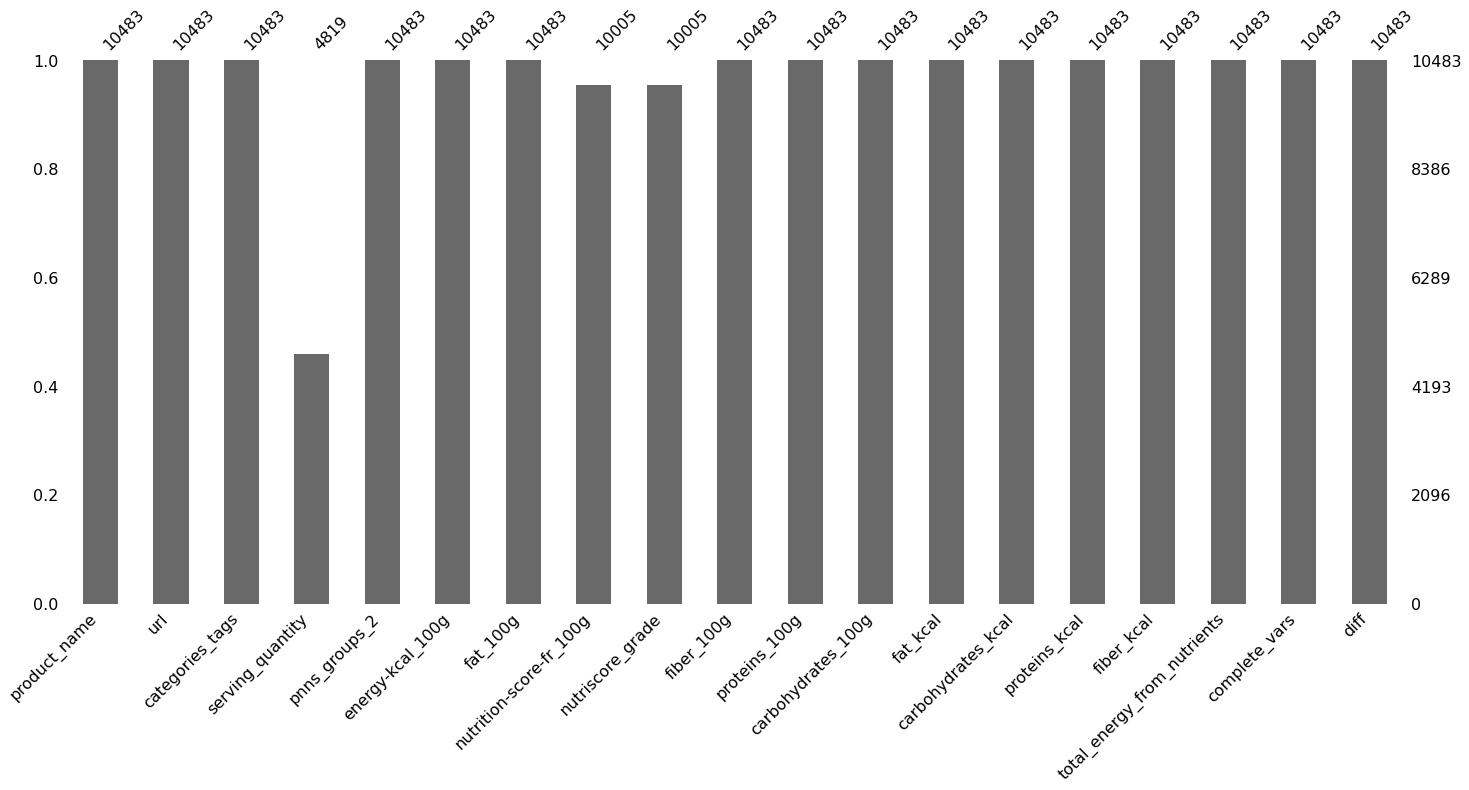

In [44]:
msno.bar(df1_no)

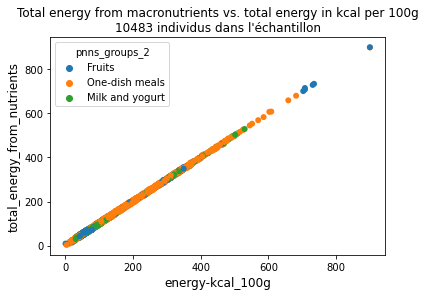

In [16]:
## graphe
sns.scatterplot(x="energy-kcal_100g", 
                y="total_energy_from_nutrients",
                data=df1_no,
                linewidth=0,
                hue="pnns_groups_2"
               )
plt.xlabel("energy-kcal_100g", fontsize=12)
plt.ylabel("total_energy_from_nutrients", fontsize=12)
plt.title('''Total energy from macronutrients vs. total energy in kcal per 100g
{} individus dans l'échantillon'''.format(df1_no.shape[0]))
plt.show()

## III.3 Reformulation des valeurs nutritionnelles en fonction des serving_quantity

In [28]:
X = df1_no.copy()

X.loc[:, "fat_kcal"] = X[["serving_quantity", "fat_kcal"]].apply(lambda x: x[1]*x[0]/100, axis=1)
X.loc[:, "carbohydrates_kcal"] = X[["serving_quantity", "carbohydrates_kcal"]].apply(lambda x: x[1]*x[0]/100, axis=1)
X.loc[:, "proteins_kcal"] = X[["serving_quantity", "proteins_kcal"]].apply(lambda x: x[1]*x[0]/100, axis=1)
X.loc[:, "fiber_kcal"] = X[["serving_quantity", "fiber_kcal"]].apply(lambda x: x[1]*x[0]/100, axis=1)
X.loc[:, "total_energy_from_nutrients"] = X[["serving_quantity", "total_energy_from_nutrients"]].apply(lambda x: x[1]*x[0]/100, axis=1)

df1_no = X

In [29]:
# reindexation du dataframe
df1_no.index = pd.Index(range(0, df1_no.shape[0]))
df1_no.to_csv("./df1_nomissing.csv", index_label=False)